# *****PROJECT ON STOCK MARKET DATA ANALYSIS*****

### DATASET  : JSW_Steel_Stock_Price

The entire idea of predicting stock price is to gain significant profits.

# *****1. Import Necessary libraries*****

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

# *****2. Import Data*****

In [2]:
stock_details = pd.read_csv('JSW_Steel_Stock_Price.csv', index_col = 'Date', parse_dates = True)
stock_details

series    OPEN    HIGH     LOW  PREV.CLOSE     ltp   close    vwap  \
Date                                                                            
2019-11-01     EQ  227.70  239.50  227.50      228.00  236.80  237.60  234.49   
2019-10-31     EQ  235.70  236.50  227.05      234.40  227.70  228.00  232.67   
2019-10-30     EQ  236.95  236.95  231.25      234.25  234.50  234.40  233.84   
2019-10-29     EQ  219.60  236.40  219.60      219.35  234.00  234.25  230.58   
2019-10-27     EQ  218.00  221.40  218.00      217.35  219.45  219.35  219.33   
...           ...     ...     ...     ...         ...     ...     ...     ...   
2017-11-07     EQ  269.05  270.65  260.50      268.00  264.50  264.05  265.67   
2017-11-06     EQ  264.40  272.00  262.05      266.60  267.85  268.00  265.41   
2017-11-03     EQ  267.00  268.50  263.55      266.20  266.60  266.60  266.03   
2017-11-02     EQ  264.75  268.65  262.00      264.75  267.75  266.20  264.20   
2017-11-01     EQ  265.00  266.85  260.95      258.45  265.20  264.75  263.72   

               52W H   52W L    VOLUME             VALUE  No of trades  
Date                                                                    
2019-11-01    359.90  201.75   9208037  2,159,187,367.55         61820  
2019-10-31    359.90  201.75   6994856  1,627,492,450.70         50711  
2019-10-30    359.90  201.75   5246865  1,226,934,902.50         35316  
2019-10-29    359.90  201.75  13887709  3,202,270,046.05         91597  
2019-10-27    368.85  201.75    756987    166,030,911.10          5642  
...              ...     ...       ...               ...           ...  
2017-11-07  1,778.70  160.60   2538762    674,464,732.60         23318  
2017-11-06  1,778.70  160.60   2518798    668,519,046.10         28836  
2017-11-03  1,778.70  160.60   1805553    480,331,361.05         29904  
2017-11-02  1,778.70  160.60   1850517    488,899,620.50         21596  
2017-11-01  1,778.70  160.60   4308393  1,136,225,405.55         33267  

[490 rows x 13 columns]

##### The JSW STEEL dataset has information of 2 Years from 1 Nov 2017 to 1 Nov 2019.
* Series - Equity(EQ)
* Open - The price at which a stock started trading when the market opened on a particular day.
* Close - The price of an individual stock when the stock exchange closed the market for the day.
* High - The highest price at which a stock traded during a period.
* Low - The lowest price of the period.
* PREV Close - when the market officially closes for the day.
* Volume - The total amount of trading activity during a period of time. 
* LTP - Last trade price at which a stock was traded in market.
* VWAP - The volume-weighted average price that shows the average price of a security adjusted for its volume.
* 52W H - The highest price that the stock has traded over a 52 week period i.e. a year. 
* 52W L - The lowest price that the stock has traded over a 52 week period i.e. a year. 

# *****3. Data Understanding*****

## 3.1 Initial Analysis :

In [3]:
#Dropping unwanted columns

stock_details = stock_details.drop(['series','PREV.CLOSE','ltp','vwap','52W H','52W L','VALUE','No of trades'], axis = 1)
stock_details

OPEN    HIGH     LOW   close    VOLUME
Date                                                
2019-11-01  227.70  239.50  227.50  237.60   9208037
2019-10-31  235.70  236.50  227.05  228.00   6994856
2019-10-30  236.95  236.95  231.25  234.40   5246865
2019-10-29  219.60  236.40  219.60  234.25  13887709
2019-10-27  218.00  221.40  218.00  219.35    756987
...            ...     ...     ...     ...       ...
2017-11-07  269.05  270.65  260.50  264.05   2538762
2017-11-06  264.40  272.00  262.05  268.00   2518798
2017-11-03  267.00  268.50  263.55  266.60   1805553
2017-11-02  264.75  268.65  262.00  266.20   1850517
2017-11-01  265.00  266.85  260.95  264.75   4308393

[490 rows x 5 columns]

In [4]:
#Renaming the Columns

stock_details.rename(columns = {'OPEN':'Open', 'HIGH':'High', 'LOW':'Low', 'close':'Close', 'VOLUME':'Volume'}, 
                     inplace = True)
print(stock_details.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [5]:
stock_details.head()

Open    High     Low   Close    Volume
Date                                                
2019-11-01  227.70  239.50  227.50  237.60   9208037
2019-10-31  235.70  236.50  227.05  228.00   6994856
2019-10-30  236.95  236.95  231.25  234.40   5246865
2019-10-29  219.60  236.40  219.60  234.25  13887709
2019-10-27  218.00  221.40  218.00  219.35    756987

In [6]:
stock_details.tail()

Open    High     Low   Close   Volume
Date                                               
2017-11-07  269.05  270.65  260.50  264.05  2538762
2017-11-06  264.40  272.00  262.05  268.00  2518798
2017-11-03  267.00  268.50  263.55  266.60  1805553
2017-11-02  264.75  268.65  262.00  266.20  1850517
2017-11-01  265.00  266.85  260.95  264.75  4308393

In [7]:
stock_details.shape

(490, 5)

In [8]:
stock_details.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [9]:
stock_details.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2019-11-01 to 2017-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    490 non-null    float64
 1   High    490 non-null    float64
 2   Low     490 non-null    float64
 3   Close   490 non-null    float64
 4   Volume  490 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [10]:
stock_details.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
stock_details.describe()

Open        High         Low       Close        Volume
count  490.000000  490.000000  490.000000  490.000000  4.900000e+02
mean   293.984286  298.525510  288.827041  293.656939  5.815337e+06
std     43.856498   44.364746   43.132563   43.674949  3.639448e+06
min    203.800000  213.750000  201.750000  205.750000  2.953630e+05
25%    267.625000  271.175000  263.312500  267.075000  3.613007e+06
50%    290.050000  294.550000  286.325000  289.875000  5.127563e+06
75%    318.887500  324.987500  314.000000  318.375000  7.194511e+06
max    420.250000  427.550000  410.100000  417.050000  4.444593e+07

In [12]:
stock_details.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [13]:
stock_details.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [14]:
stock_details.value_counts()

Open    High    Low     Close   Volume  
203.80  214.55  201.75  211.95  18785875    1
312.00  313.00  308.00  310.45  4048889     1
311.25  327.80  311.25  322.85  8395329     1
        314.25  305.55  307.80  3695342     1
310.75  316.90  308.45  316.10  5314911     1
                                           ..
275.70  277.20  272.10  276.15  3233802     1
275.45  277.70  271.55  276.40  3064045     1
        276.45  267.65  273.50  4804512     1
275.00  282.95  272.45  281.00  5277444     1
420.25  427.55  389.30  408.00  10218645    1
Length: 490, dtype: int64

## 3.2 Correlation Matrix :

In [15]:
corr_matrix = stock_details.corr()
corr_matrix

Open      High       Low     Close    Volume
Open    1.000000  0.995779  0.995257  0.990621 -0.065115
High    0.995779  1.000000  0.995094  0.996613 -0.025346
Low     0.995257  0.995094  1.000000  0.996224 -0.079460
Close   0.990621  0.996613  0.996224  1.000000 -0.044076
Volume -0.065115 -0.025346 -0.079460 -0.044076  1.000000

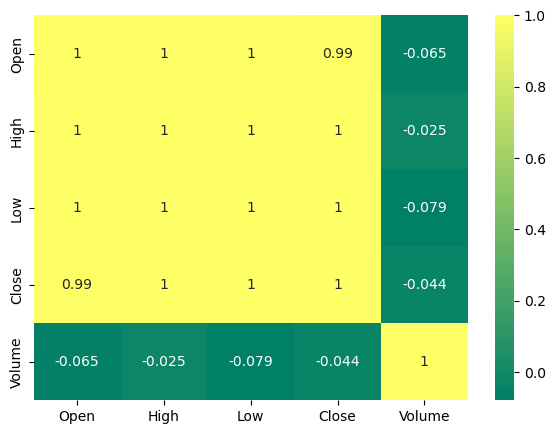

In [16]:
plt.figure(figsize = (7,5))
sns.heatmap(stock_details.corr(), annot = True, cmap = 'summer')
plt.show()

# *****4 Data Visualization***** 

## 4.1 Using Pairplot :

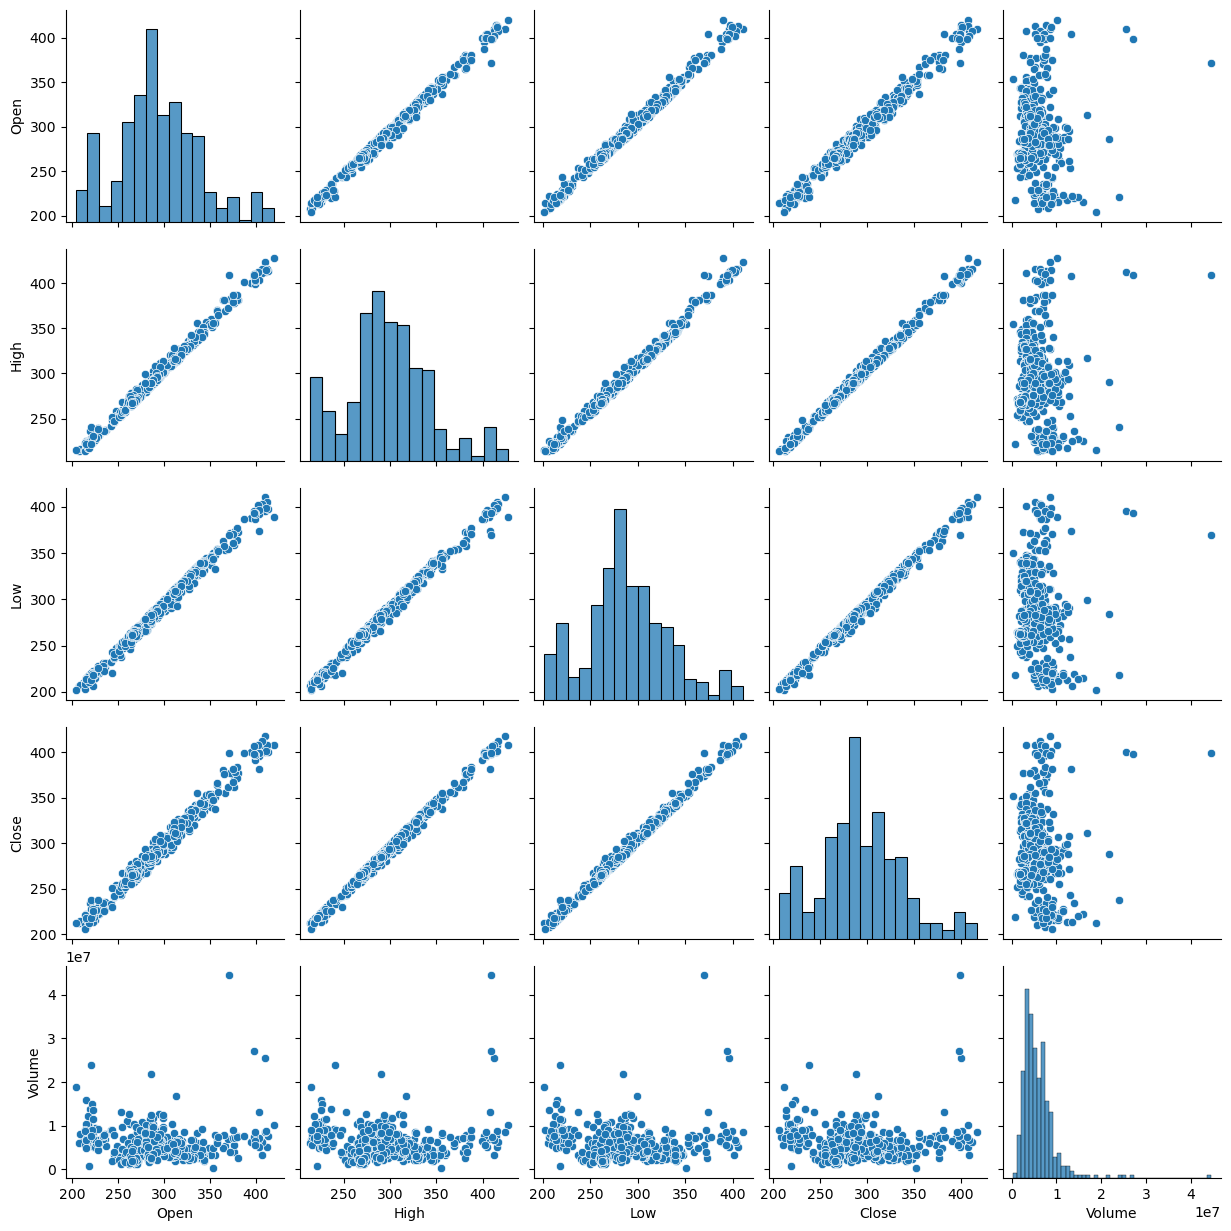

In [17]:
sns.pairplot(stock_details)
plt.show()

## 4.2 Visualizing the Attributes of our Datasets :

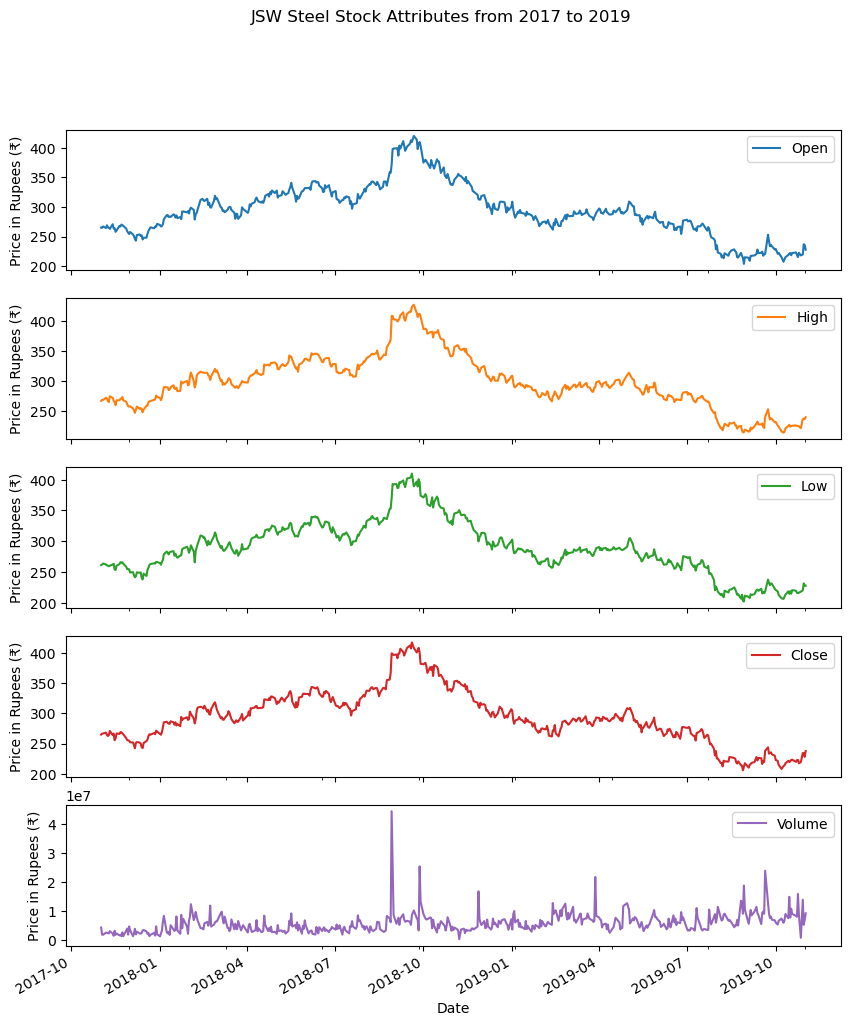

In [18]:
stock_details['2017':'2019'].plot(subplots = True, figsize = (10,12), ylabel = ('Price in Rupees (₹)'),
                                  title = ('JSW Steel Stock Attributes from 2017 to 2019'))
plt.show()

##### From the above plot we can see the visualizing attributes of our dataset. And also we can know that In which month the stock price has been rised and droped . As we can see from above plots there is not much diffrences b/w them.

##### 

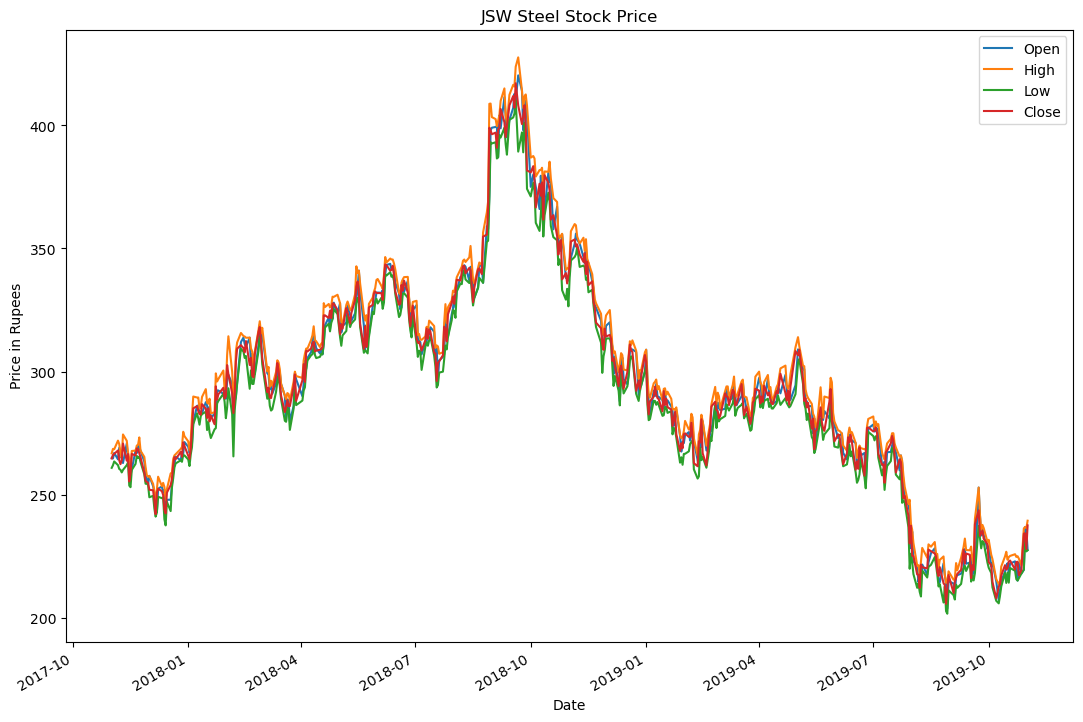

In [19]:
plt.figure(figsize = (13,9))
stock_details.Open.plot()
stock_details.High.plot()
stock_details.Low.plot()
stock_details.Close.plot()

plt.title('JSW Steel Stock Price')
plt.ylabel('Price in Rupees')
plt.legend(['Open','High','Low','Close'])
plt.show()

## A) Plotting Opening price for JSW Steel Stock :

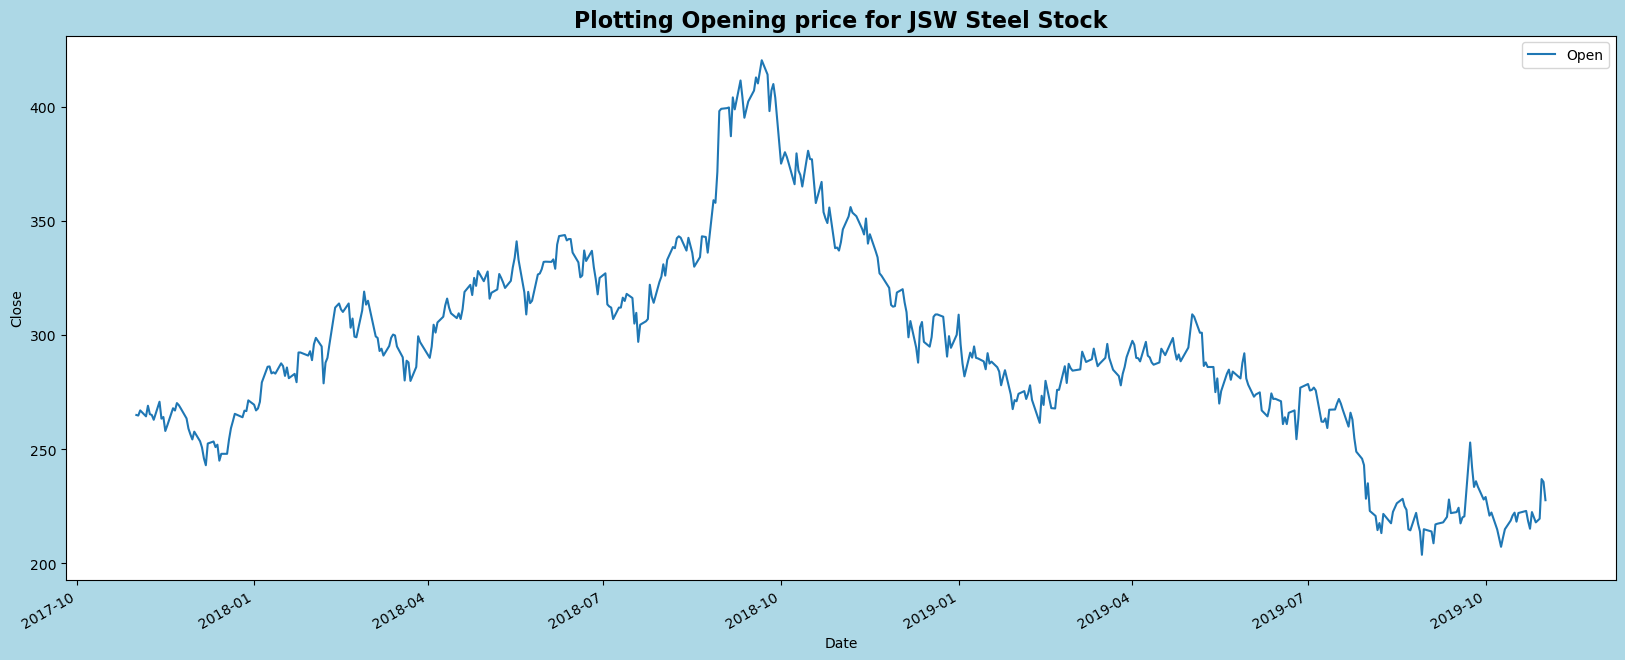

In [20]:
plt.figure(figsize = (20,8), facecolor = 'lightblue')
stock_details['Open'].plot(legend = True)

plt.title('Plotting Opening price for JSW Steel Stock', fontsize = 16, fontweight ='bold')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## B) Plotting Closing price for JSW Steel Stock :

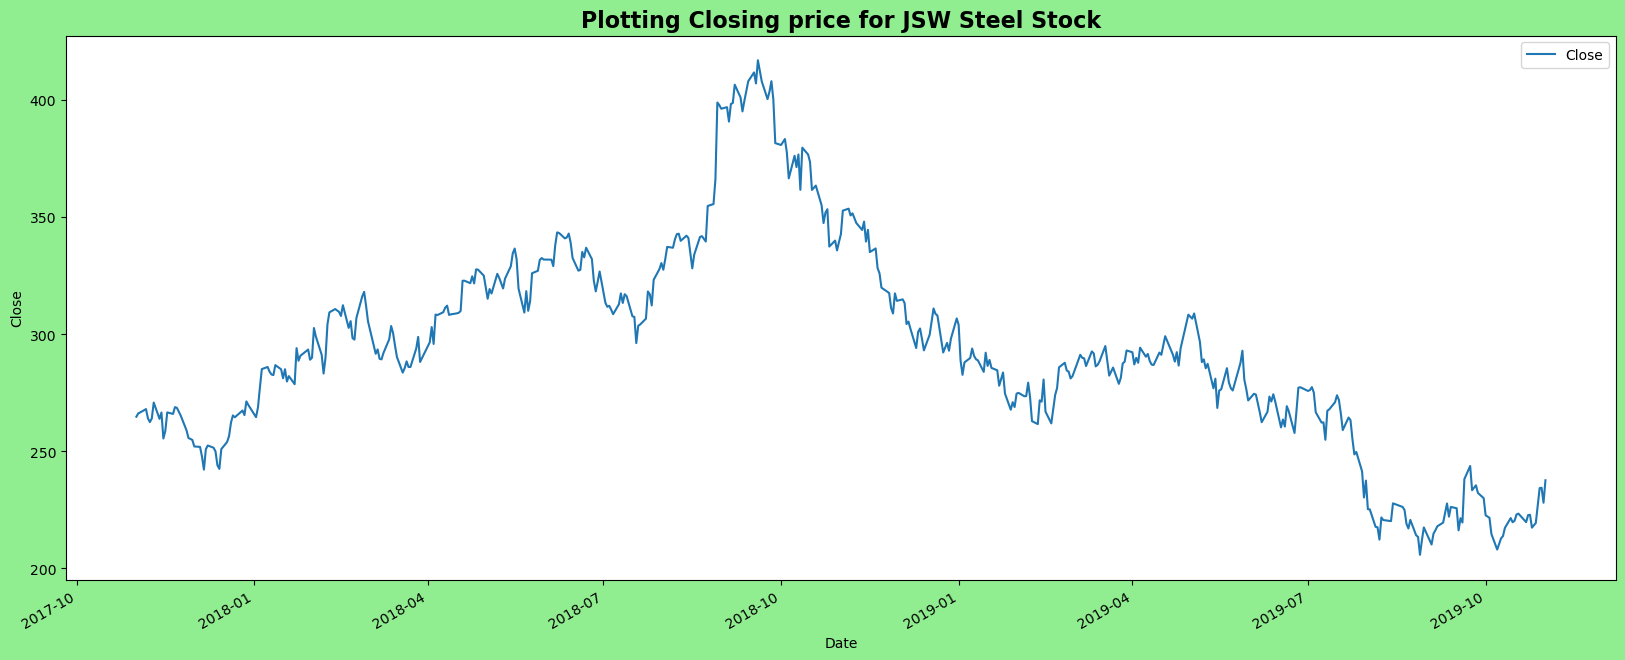

In [21]:
plt.figure(figsize = (20,8), facecolor = 'lightgreen')
stock_details['Close'].plot(legend = True)

plt.title('Plotting Closing price for JSW Steel Stock', fontsize = 16, fontweight ='bold')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## C) Ploting Total Volume of Stock being Traded Each Day :

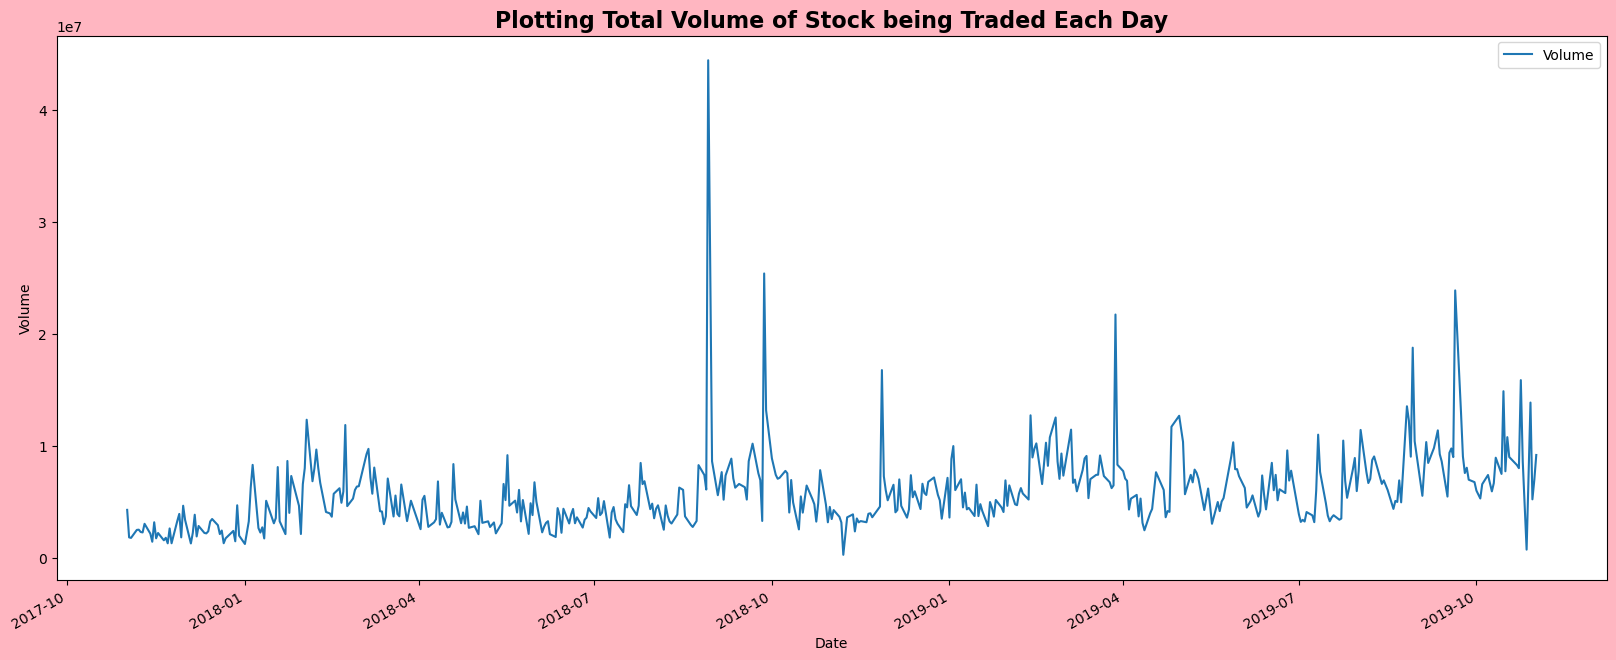

In [22]:
plt.figure(figsize = (20,8), facecolor = 'lightpink')
stock_details['Volume'].plot(legend = True)

plt.title('Plotting Total Volume of Stock being Traded Each Day', fontsize = 16, fontweight ='bold')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

##### 

## 4.3 Correlation B/w Open and Close Price :

In [23]:
import plotly.express as px

In [24]:
fig = px.histogram(stock_details, 
                   x = 'Open', 
                   marginal = 'box', 
                   color_discrete_sequence = ['red'], 
                   title = 'Distribution of Open Price')
fig.update_layout(bargap = 0.1)
fig.show()

In [25]:
fig = px.histogram(stock_details, 
                   x = 'Close', 
                   marginal = 'box', 
                   nbins = 47, 
                   title = 'Distribution of Close Price')
fig.update_layout(bargap = 0.1)
fig.show()

In [26]:
fig = px.scatter(stock_details, 
                 x = 'Open', 
                 y = 'Close', 
                 color_discrete_sequence = ['green'],
                 opacity = 0.8, 
              
                 title = 'Correlation B/w Open Price vs Close Price')
fig.update_traces(marker_size = 5)
fig.show()

##### There is a Great linear correlation between "Open" and "Close". As we can see from the above scatter plot.

##### 

## 4.4 Daily Return Analysis :

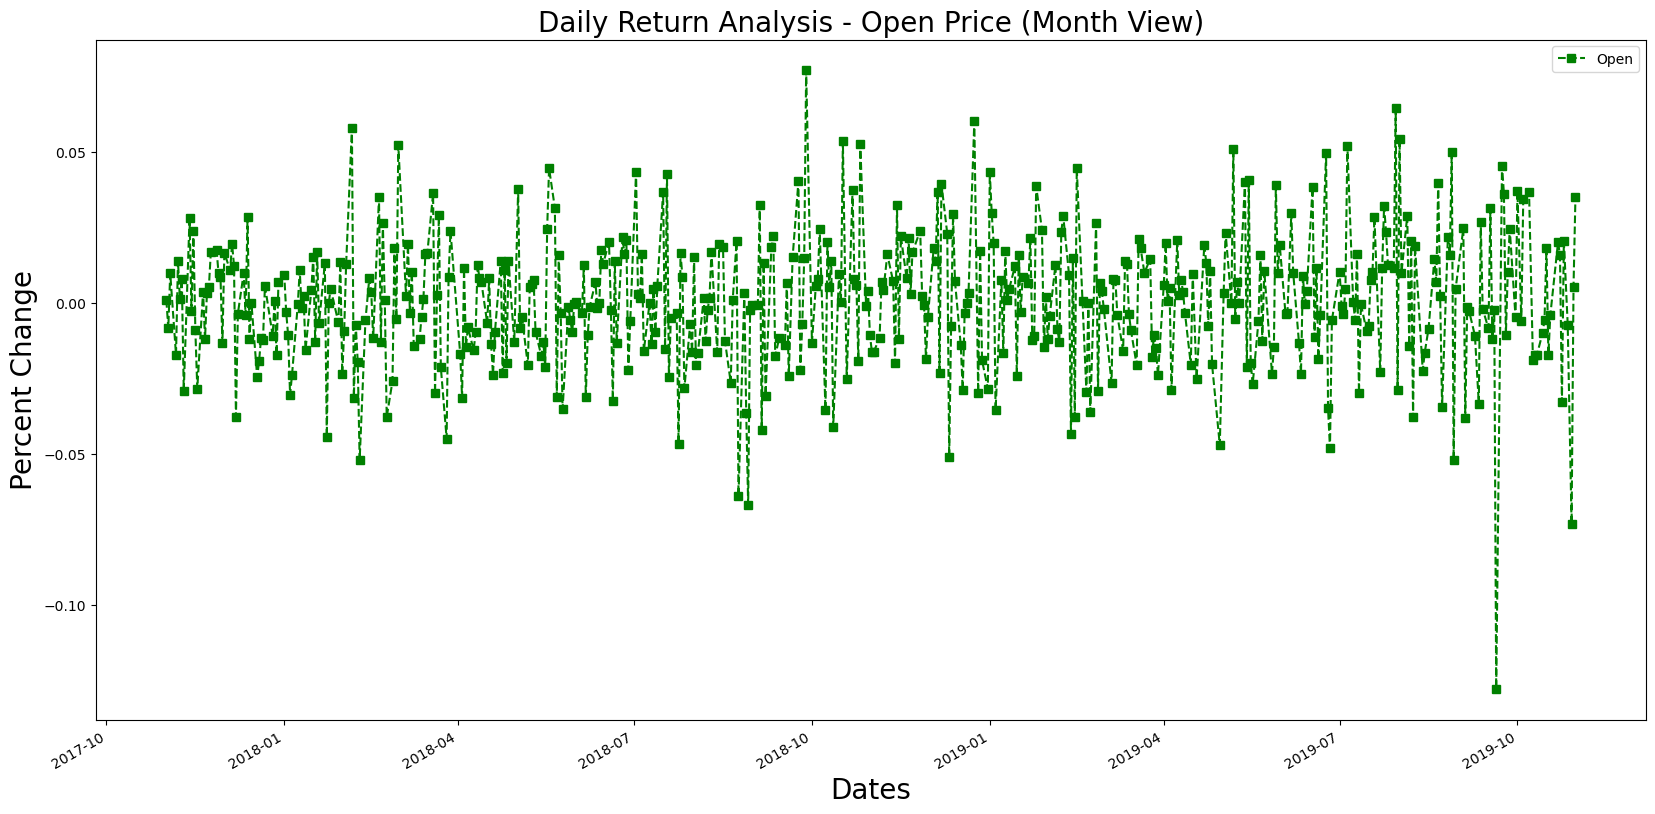

In [27]:
plt.subplots(figsize = (20,10))
(stock_details['Open'].pct_change()).plot( legend = True, linestyle = '--', marker = 's', color = 'green')

plt.xlabel('Dates',size = 20)
plt.ylabel('Percent Change', size = 20)
plt.title('Daily Return Analysis - Open Price (Month View)', size = 20)

plt.show()

##### From the above graph we can see the daily return analysis for Open Price in which the highest return we got approximate of 8% and the most lowest price for daily return approximate of -14% and it does not have more variations.

##### 

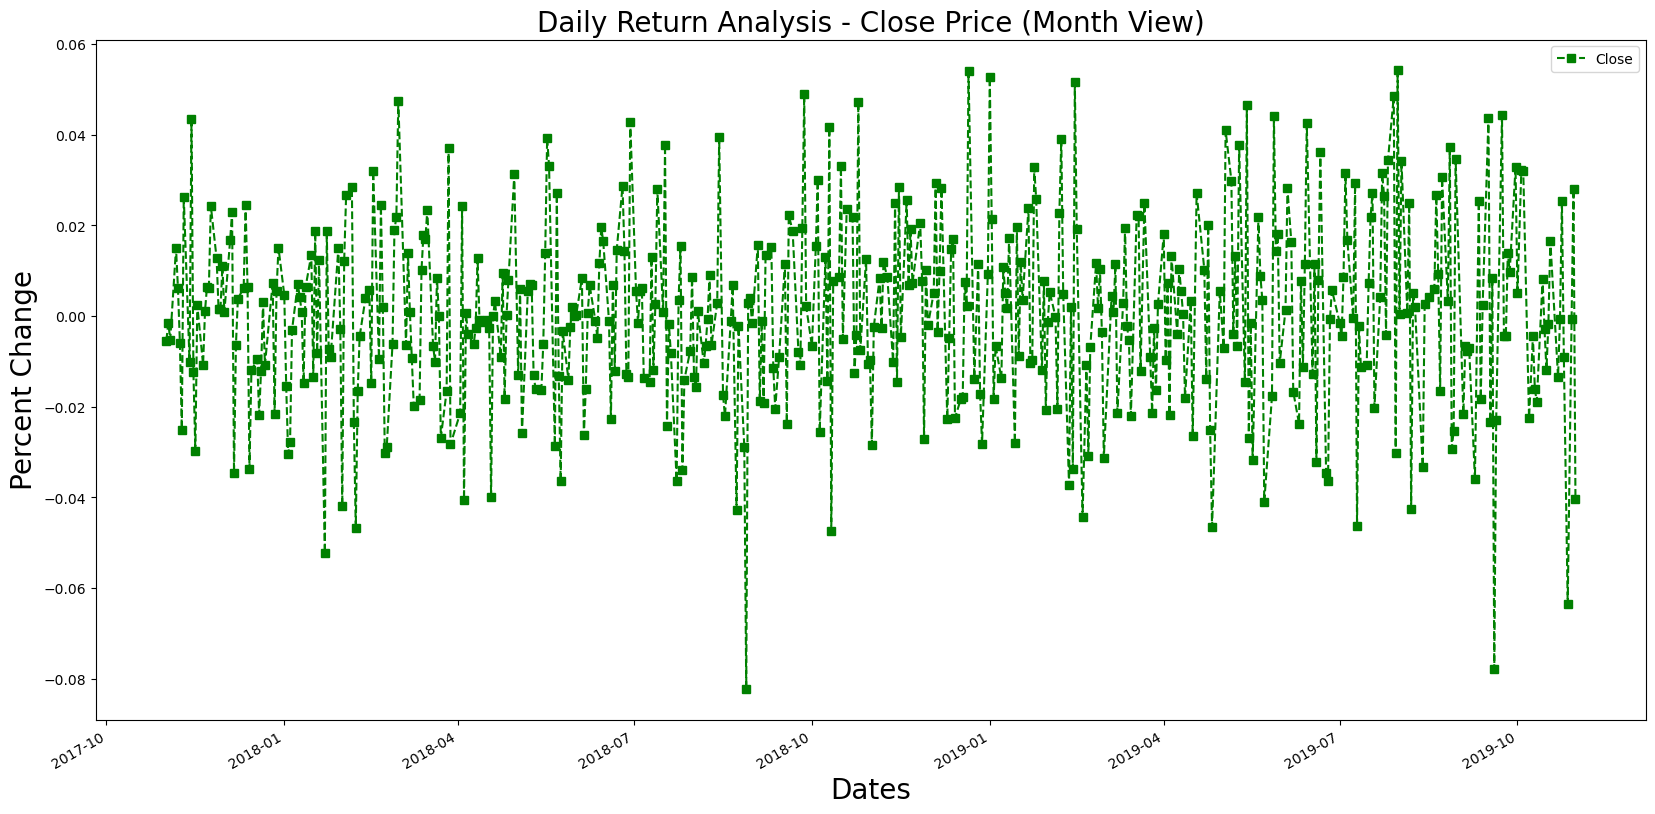

In [28]:
plt.subplots(figsize = (20,10))
(stock_details['Close'].pct_change()).plot( legend = True, linestyle = '--', marker = 's', color = 'green')

plt.xlabel('Dates',size = 20)
plt.ylabel('Percent Change', size = 20)
plt.title('Daily Return Analysis - Close Price (Month View)', size = 20)

plt.show()

##### From the above graph we can see the daily return analysis for Close Price in which the highest return we got above 4% multiple times and the most lowest price of -8% compare to open price closing price is better and it has more variations.

##### 

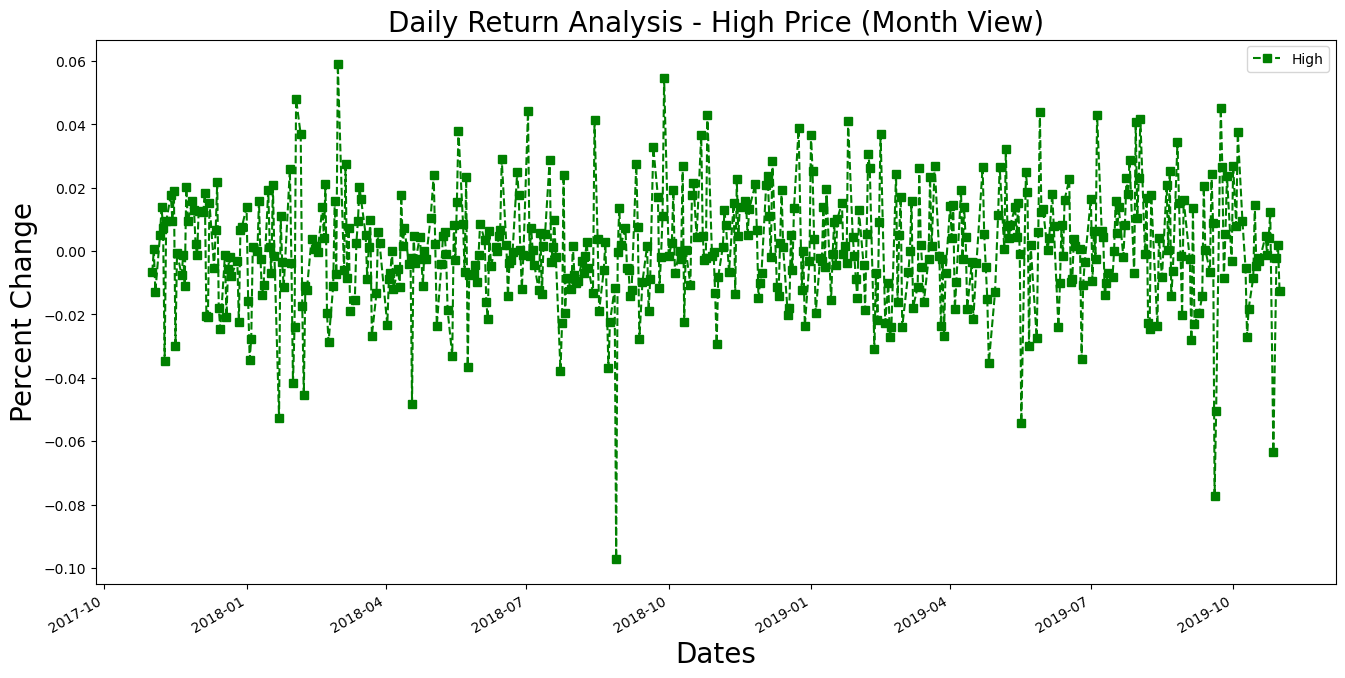

In [29]:
plt.subplots(figsize = (16,8))
(stock_details['High'].pct_change()).plot( legend = True, linestyle = '--', marker = 's', color = 'green')

plt.xlabel('Dates',size = 20)
plt.ylabel('Percent Change', size = 20)
plt.title('Daily Return Analysis - High Price (Month View)', size = 20)

plt.show()

##### From the above graph we can see the daily return analysis for High Price in which the highest return we got between 4% - 6% multiple days and the most lowest price of -10%.

##### 

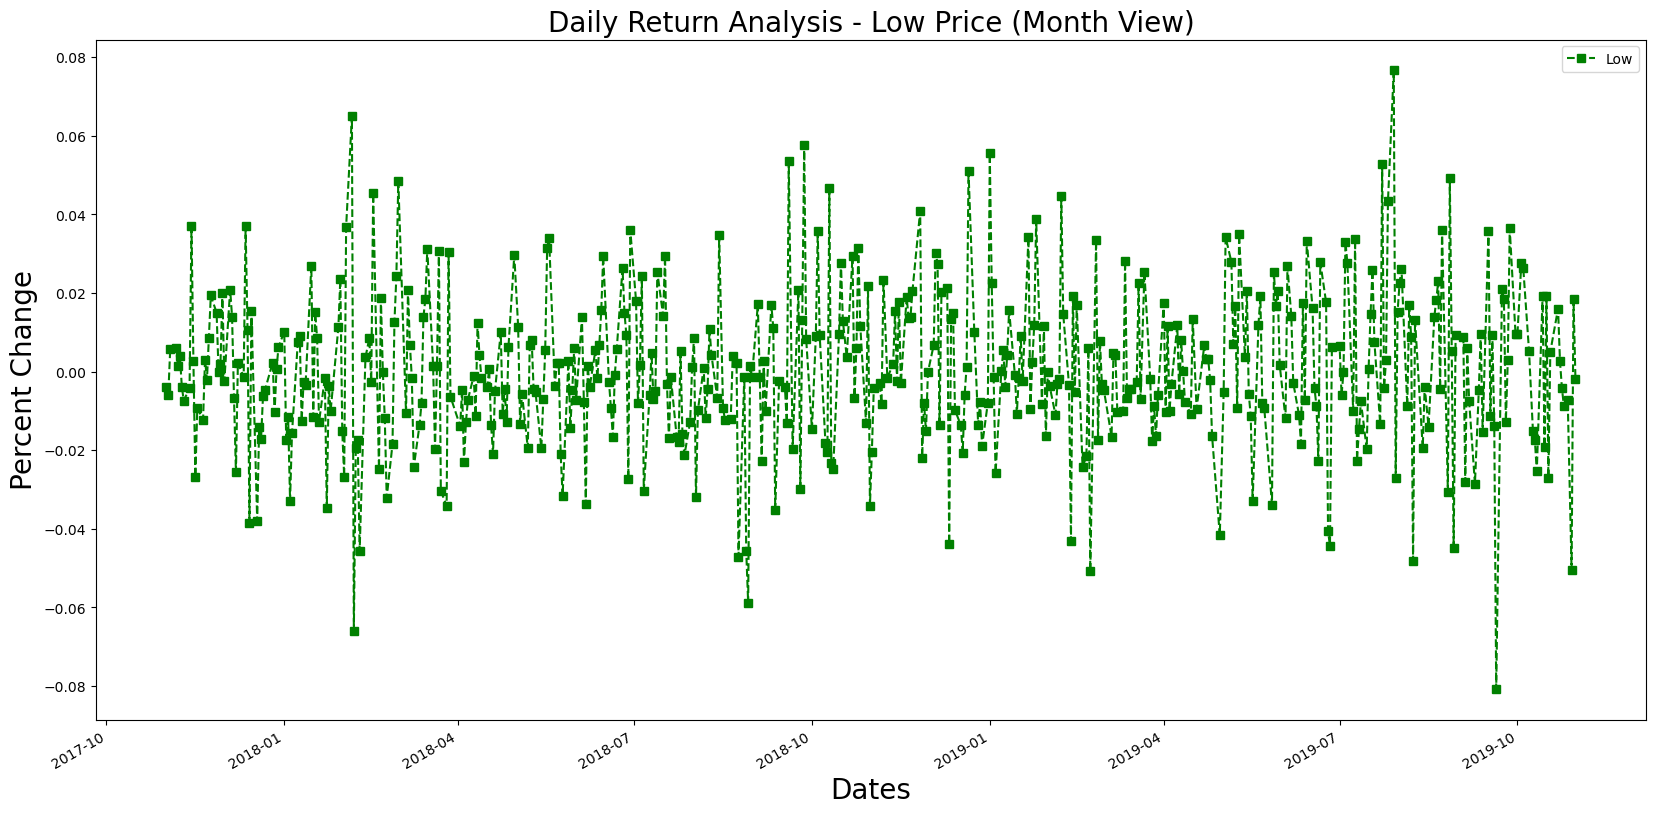

In [30]:
plt.subplots(figsize = (20,10))
(stock_details['Low'].pct_change()).plot( legend = True, linestyle = '--', marker = 's', color = 'green')

plt.xlabel('Dates',size = 20)
plt.ylabel('Percent Change', size = 20)
plt.title('Daily Return Analysis - Low Price (Month View)', size = 20)

plt.show()

##### From the above graph we can see the daily return analysis for Low Price in which the highest return we got 8% only for single day and the most lowest price more than -8% and most of days have got between 4% to 6%.

##### 

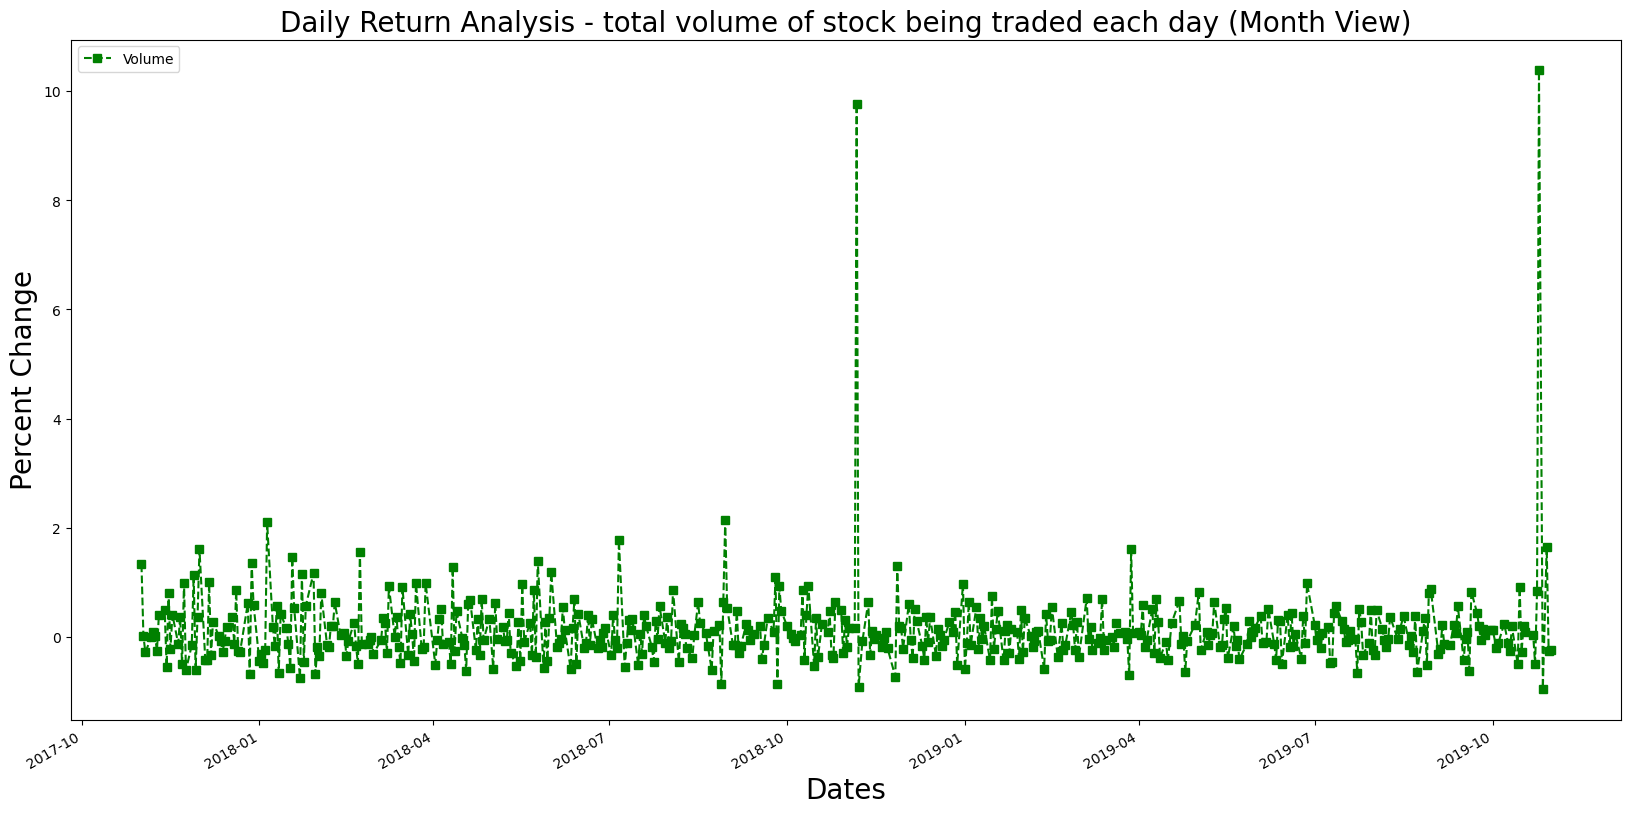

In [31]:
plt.subplots(figsize = (20,10))
(stock_details['Volume'].pct_change()).plot( legend = True, linestyle = '--', marker = 's', color = 'green')

plt.xlabel('Dates',size = 20)
plt.ylabel('Percent Change', size = 20)
plt.title('Daily Return Analysis - total volume of stock being traded each day (Month View)', size = 20)

plt.show()

##### From the above graph we can see the daily return analysis for Volume number of share trades in which we can see that between 2018-11 to 2018-12 the traders have increased upto 10% for a single day and in the 2019-10 to 2019-11 again it had increased more than 10% for a single day that means most of the days shares are lying only upto 2%.

##### 

## 4.5 Compare the daily returns of Open and Close :

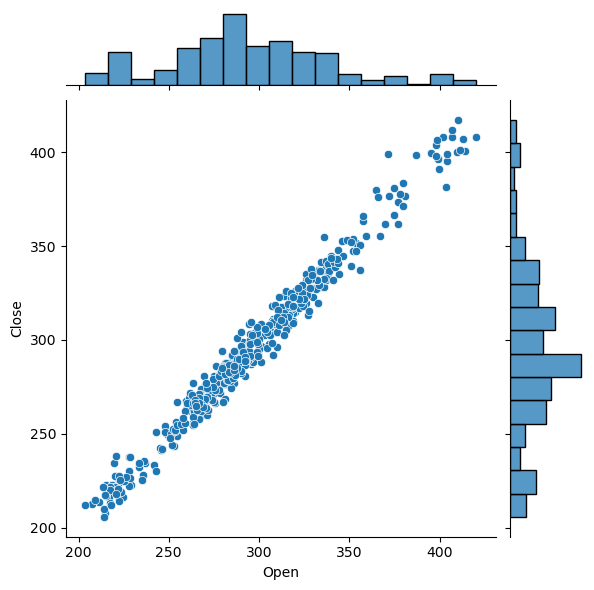

In [32]:
sns.jointplot(x = 'Open', y = 'Close', data = stock_details, kind = 'scatter')
plt.show()

##### So now we can see that the two stocks of Open and Close are good correlated with each other and a linear relationship between its daily return values.

## 4.6 Comparing Open column itself should show a perfectly linear relationship :

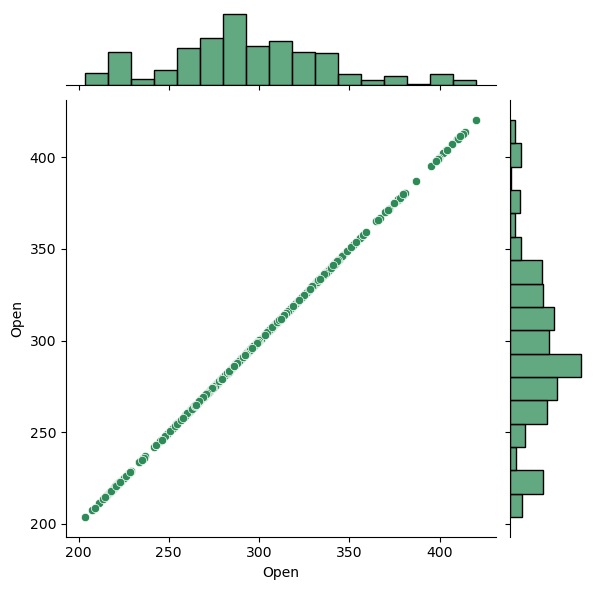

In [33]:
sns.jointplot(x = 'Open', y = 'Open', data = stock_details, kind = 'scatter', color = 'seagreen')
plt.show()

## 4.7 Moving Average ( MA ) Trading Strategy :

In [34]:
ma_day = [10,20,30]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_details[column_name] = pd.DataFrame.rolling(stock_details['Close'],ma).mean()

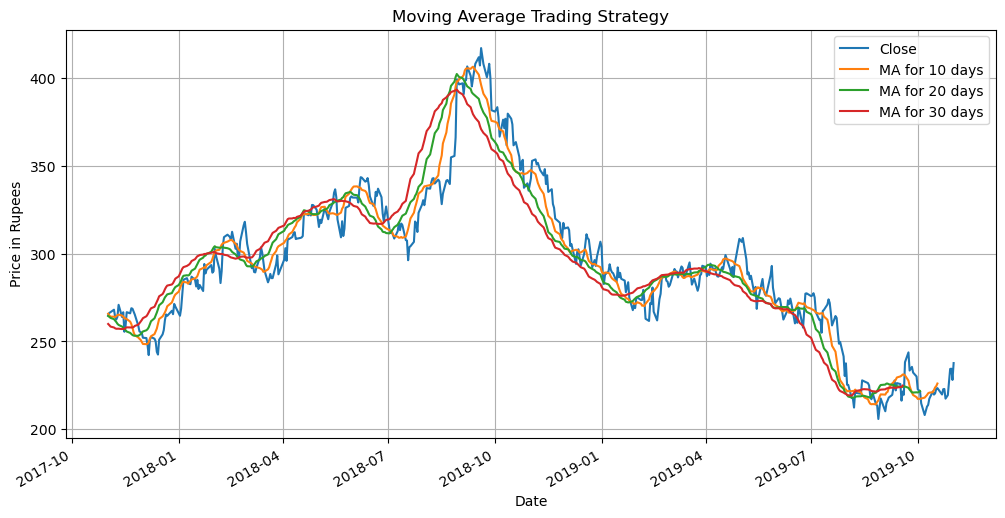

In [35]:
stock_details[['Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots = False,
                                                                                 figsize = (12,6), legend = True)

plt.grid()
plt.title('Moving Average Trading Strategy')
plt.ylabel("Price in Rupees")
plt.show()

##### Moving averages are commonly used in technical analysis of stocks to predict the past and future price trends. A 10-day moving average is a powerful tool to know if prices are moving in an uptrend or a downtrend.

* Mostly the MA for 10 days, 20 days,30 days are moving in uptrend till 2018-09 and till that stock price were on the rise.
* By seeing above graph after 2018-09 there is continuous drop till 2019-02.
* Then again it got rised and again it got droped.

##### 

## 4.8 Expanding Window Method :

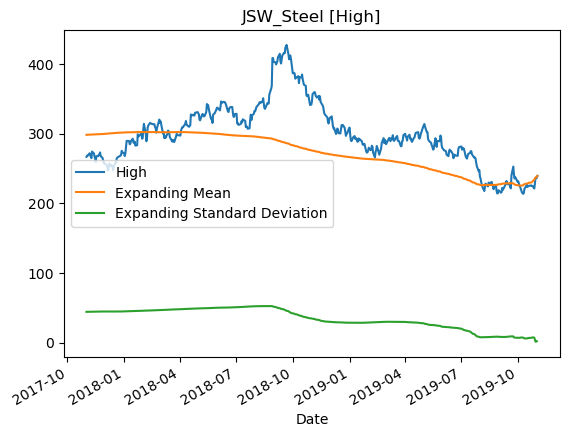

In [36]:
JSW_Steel_mean = stock_details.High.expanding().mean()
JSW_Steel_std = stock_details.High.expanding().std()
stock_details.High.plot()
JSW_Steel_mean.plot()
JSW_Steel_std.plot()

plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('JSW_Steel [High]')
plt.show()

##### From the above Expanding window method For JSW steel Data we can see that ,
* From 2017-11 to 2018-01 " High " value was under mean for a period of time so we can say there was some loss.

* After 2018-01 the 'High' value was above the mean and it got rised every month but in 2018-10 the price had reached more than 400 after that it had dropped but it was above mean line for long period and it was maintained continously above mean line we can say that there was less loss and more profit.

##### 

# *****5. Perform Assumption Check*****

## 5.1 Normality / Distribution Test Using Distplot :

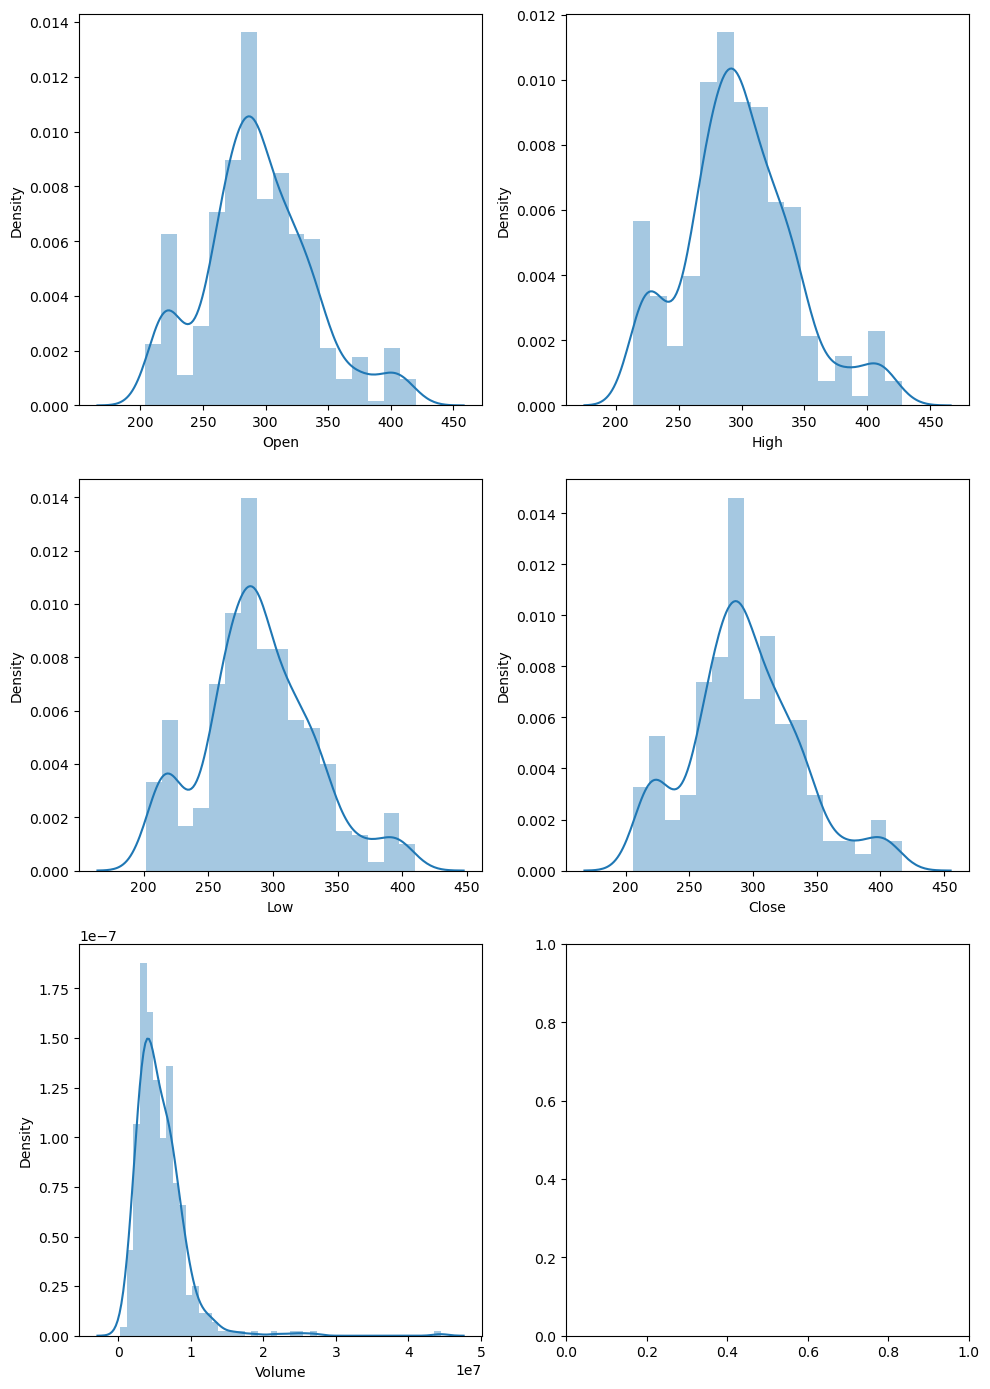

In [37]:
fig, ax = plt.subplots(3,2, figsize = (10,14))

sns.distplot(stock_details.Open, ax = ax[0,0])
sns.distplot(stock_details.High, ax = ax[0,1])
sns.distplot(stock_details.Low, ax = ax[1,0])
sns.distplot(stock_details.Close, ax = ax[1,1])
sns.distplot(stock_details.Volume, ax = ax[2,0])

plt.tight_layout()
plt.show()

##### In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions and the Volume data is left-skewed.

##### 

## 5.2 Outlier Test Using Box Plot :

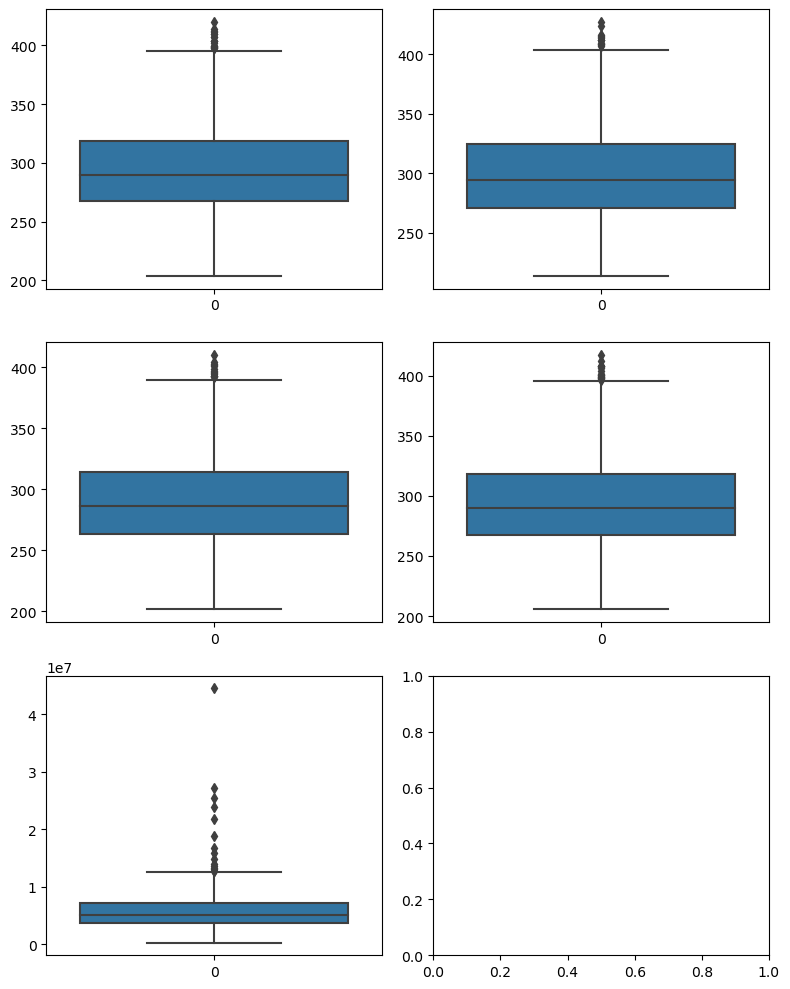

In [38]:
fig, ax = plt.subplots(3,2, figsize = (8,10))

sns.boxplot(stock_details.Open, ax = ax[0,0])
sns.boxplot(stock_details.High, ax = ax[0,1])
sns.boxplot(stock_details.Low, ax = ax[1,0])
sns.boxplot(stock_details.Close, ax = ax[1,1])
sns.boxplot(stock_details.Volume, ax = ax[2,0])

plt.tight_layout()
plt.show()

##### From the above boxplots, we can conclude that for every data there is a outliers.

##### 

## 5.3 Sorting Values :

In [39]:
stock_details

Open    High     Low   Close    Volume  MA for 10 days  \
Date                                                                   
2019-11-01  227.70  239.50  227.50  237.60   9208037             NaN   
2019-10-31  235.70  236.50  227.05  228.00   6994856             NaN   
2019-10-30  236.95  236.95  231.25  234.40   5246865             NaN   
2019-10-29  219.60  236.40  219.60  234.25  13887709             NaN   
2019-10-27  218.00  221.40  218.00  219.35    756987             NaN   
...            ...     ...     ...     ...       ...             ...   
2017-11-07  269.05  270.65  260.50  264.05   2538762         263.835   
2017-11-06  264.40  272.00  262.05  268.00   2518798         264.040   
2017-11-03  267.00  268.50  263.55  266.60   1805553         264.040   
2017-11-02  264.75  268.65  262.00  266.20   1850517         264.795   
2017-11-01  265.00  266.85  260.95  264.75   4308393         265.725   

            MA for 20 days  MA for 30 days  
Date                                        
2019-11-01             NaN             NaN  
2019-10-31             NaN             NaN  
2019-10-30             NaN             NaN  
2019-10-29             NaN             NaN  
2019-10-27             NaN             NaN  
...                    ...             ...  
2017-11-07        261.8175      257.408333  
2017-11-06        262.6250      257.876667  
2017-11-03        263.3525      258.400000  
2017-11-02        263.9200      259.191667  
2017-11-01        264.3950      259.883333  

[490 rows x 8 columns]

In [40]:
df = stock_details.drop(['Volume','MA for 10 days','MA for 20 days','MA for 30 days',],axis = 1)
df

Open    High     Low   Close
Date                                      
2019-11-01  227.70  239.50  227.50  237.60
2019-10-31  235.70  236.50  227.05  228.00
2019-10-30  236.95  236.95  231.25  234.40
2019-10-29  219.60  236.40  219.60  234.25
2019-10-27  218.00  221.40  218.00  219.35
...            ...     ...     ...     ...
2017-11-07  269.05  270.65  260.50  264.05
2017-11-06  264.40  272.00  262.05  268.00
2017-11-03  267.00  268.50  263.55  266.60
2017-11-02  264.75  268.65  262.00  266.20
2017-11-01  265.00  266.85  260.95  264.75

[490 rows x 4 columns]

In [41]:
stock_details_1 = df.sort_values(by = ['Date'])
stock_details_1

Open    High     Low   Close
Date                                      
2017-11-01  265.00  266.85  260.95  264.75
2017-11-02  264.75  268.65  262.00  266.20
2017-11-03  267.00  268.50  263.55  266.60
2017-11-06  264.40  272.00  262.05  268.00
2017-11-07  269.05  270.65  260.50  264.05
...            ...     ...     ...     ...
2019-10-27  218.00  221.40  218.00  219.35
2019-10-29  219.60  236.40  219.60  234.25
2019-10-30  236.95  236.95  231.25  234.40
2019-10-31  235.70  236.50  227.05  228.00
2019-11-01  227.70  239.50  227.50  237.60

[490 rows x 4 columns]

## 5.4 Downsampling and Converted into Daily data :

In [42]:
stock_details_resample = stock_details_1.resample('d').mean()
stock_details_resample

Open    High     Low   Close
Date                                      
2017-11-01  265.00  266.85  260.95  264.75
2017-11-02  264.75  268.65  262.00  266.20
2017-11-03  267.00  268.50  263.55  266.60
2017-11-04     NaN     NaN     NaN     NaN
2017-11-05     NaN     NaN     NaN     NaN
...            ...     ...     ...     ...
2019-10-28     NaN     NaN     NaN     NaN
2019-10-29  219.60  236.40  219.60  234.25
2019-10-30  236.95  236.95  231.25  234.40
2019-10-31  235.70  236.50  227.05  228.00
2019-11-01  227.70  239.50  227.50  237.60

[731 rows x 4 columns]

## 5.5 Interpolation using Polynomial method :

In [43]:
stock_price = stock_details_resample.interpolate(method = "polynomial", order = 2)
round(stock_price, 2)

Open    High     Low   Close
Date                                      
2017-11-01  265.00  266.85  260.95  264.75
2017-11-02  264.75  268.65  262.00  266.20
2017-11-03  267.00  268.50  263.55  266.60
2017-11-04  266.35  269.39  264.06  267.73
2017-11-05  263.10  271.40  263.37  269.32
...            ...     ...     ...     ...
2019-10-28  214.20  228.96  216.15  227.26
2019-10-29  219.60  236.40  219.60  234.25
2019-10-30  236.95  236.95  231.25  234.40
2019-10-31  235.70  236.50  227.05  228.00
2019-11-01  227.70  239.50  227.50  237.60

[731 rows x 4 columns]

## 5.6 Reseting Index :

In [44]:
stock_price.reset_index(inplace = True)
stock_price

Date        Open        High         Low       Close
0   2017-11-01  265.000000  266.850000  260.950000  264.750000
1   2017-11-02  264.750000  268.650000  262.000000  266.200000
2   2017-11-03  267.000000  268.500000  263.550000  266.600000
3   2017-11-04  266.353906  269.389992  264.062186  267.729663
4   2017-11-05  263.103993  271.397757  263.374234  269.322509
..         ...         ...         ...         ...         ...
726 2019-10-28  214.203110  228.962253  216.152716  227.262601
727 2019-10-29  219.600000  236.400000  219.600000  234.250000
728 2019-10-30  236.950000  236.950000  231.250000  234.400000
729 2019-10-31  235.700000  236.500000  227.050000  228.000000
730 2019-11-01  227.700000  239.500000  227.500000  237.600000

[731 rows x 5 columns]

##### 

# *****6. Applying Neural Network*****

## 6.1 Model Training :

In [45]:
# Creating new dataframe with only 'Open' column 
data = stock_price.filter(['Open'])

In [46]:
# Converting dataframe to a numpy array
dataset = data.values

In [47]:
# Get the number of rows to train the model
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

658

## 6.2 Normalizing the Dataset :

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.27740592],
       [0.27627273],
       [0.28647148],
       [0.28354288],
       [0.26881175],
       [0.27468626],
       [0.29576367],
       [0.2789924 ],
       [0.27740592],
       [0.26788709],
       [0.27910979],
       [0.30833963],
       [0.30369603],
       [0.27015348],
       [0.27332643],
       [0.24567649],
       [0.25632851],
       [0.27354438],
       [0.2879744 ],
       [0.29077762],
       [0.28624484],
       [0.30097636],
       [0.29689686],
       [0.29055098],
       [0.28653074],
       [0.28324254],
       [0.27060676],
       [0.25020927],
       [0.23887732],
       [0.22890522],
       [0.24431666],
       [0.24865237],
       [0.23736665],
       [0.22527899],
       [0.2130405 ],
       [0.19128317],
       [0.17768484],
       [0.22074622],
       [0.24427314],
       [0.23778577],
       [0.22482572],
       [0.21372041],
       [0.21847983],
       [0.18675039],
       [0.20034872],
       [0.20442757],
       [0.19273737],
       [0.200

## 6.3 Creating X_train and y_train Data Structures :

In [49]:
# Creating training data set 
train_data = scaled_data[0:int(training_data_len), :]

In [50]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

[array([0.27740592, 0.27627273, 0.28647148, 0.28354288, 0.26881175,
       0.27468626, 0.29576367, 0.2789924 , 0.27740592, 0.26788709,
       0.27910979, 0.30833963, 0.30369603, 0.27015348, 0.27332643,
       0.24567649, 0.25632851, 0.27354438, 0.2879744 , 0.29077762,
       0.28624484, 0.30097636, 0.29689686, 0.29055098, 0.28653074,
       0.28324254, 0.27060676, 0.25020927, 0.23887732, 0.22890522,
       0.24431666, 0.24865237, 0.23736665, 0.22527899, 0.2130405 ,
       0.19128317, 0.17768484, 0.22074622, 0.24427314, 0.23778577,
       0.22482572, 0.21372041, 0.21847983, 0.18675039, 0.20034872,
       0.20442757, 0.19273737, 0.20034872, 0.22867858, 0.25111582,
       0.26494079, 0.27967231, 0.28402169, 0.27578053, 0.26778547,
       0.27287315, 0.2860182 , 0.28511164, 0.30641569, 0.31614487])]
[0.30930984945662365]
[array([0.27740592, 0.27627273, 0.28647148, 0.28354288, 0.26881175,
       0.27468626, 0.29576367, 0.2789924 , 0.27740592, 0.26788709,
       0.27910979, 0.30833963, 0.303

## 6.4 Reshape the Data :

In [51]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(598, 60, 1)

##### 

# *****MODEL 1 - Stacked LSTM*****

## A) Model Building 

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [54]:
model_1 = Sequential()
model_1.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model_1.add(LSTM(64, return_sequences = False))
model_1.add(Dense(25))
model_1.add(Dense(1))

## B) Fitting the Model

In [55]:
# Compile the model
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])

# Train the model
model_1.fit(x_train, y_train, batch_size = 1, epochs = 1)

598/598 [==============================] - 38s 50ms/step - loss: 0.0042 - accuracy: 0.0017


## C) Create the Testing Data set

In [56]:
test_data = scaled_data[training_data_len - 60: , :]

In [57]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## D) Predicting the Values

In [58]:
predictions_1 = model_1.predict(x_test)
predictions_1 = scaler.inverse_transform(predictions_1)

3/3 [==============================] - 3s 37ms/step


## E) Get the root mean squared error Value (RMSE)

In [59]:
rmse_1 = np.sqrt(np.mean(((predictions_1 - y_test) ** 2)))
print('RMSE value of Stacked LSTM :', rmse_1)

RMSE value of Stacked LSTM : 8.660170652533175


## F) Plotting the Actual and Predicted Prices

In [60]:
train = data[:training_data_len]
valid_1 = data[training_data_len:]
valid_1['Predictions_1'] = predictions_1

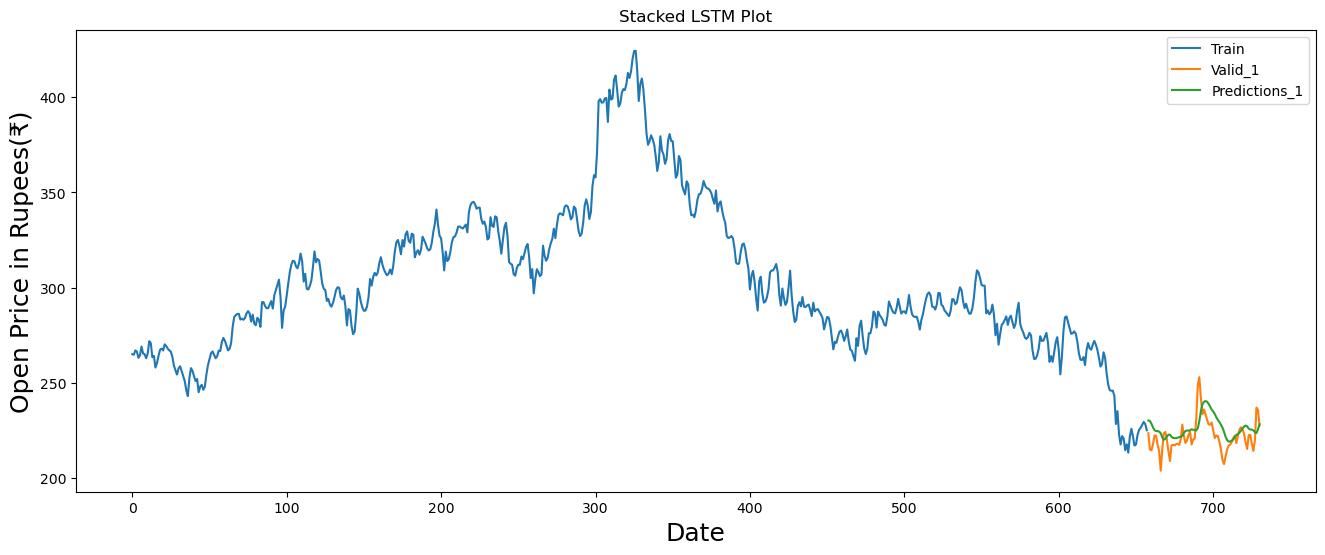

In [61]:
plt.figure(figsize = (16,6))
plt.title('Stacked LSTM Plot')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price in Rupees(₹)', fontsize = 18)
plt.plot(train['Open'])
plt.plot(valid_1[['Open', 'Predictions_1']])
plt.legend(['Train', 'Valid_1', 'Predictions_1'], loc = 'upper right')
plt.show()

In [62]:
valid_1

Open  Predictions_1
658  223.500000     230.167480
659  215.000000     229.951401
660  214.500000     228.483170
661  217.716729     226.562469
662  222.374482     225.085907
..          ...            ...
726  214.203110     224.984787
727  219.600000     224.026016
728  236.950000     223.569626
729  235.700000     225.515045
730  227.700000     228.224899

[73 rows x 2 columns]

##### 

# *****MODEL 2 - Bidirectional LSTM*****

## A) Model Building

In [63]:
from keras.layers import Bidirectional

In [64]:
model_2 = Sequential()

model_2.add(Bidirectional(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1))))
model_2.add(Bidirectional(LSTM(units = 50)))

model_2.add(Dense(units = 1))

## B) Fitting the Model

In [65]:
# Compile the model
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])

# Train the model
model_2.fit(x_train, y_train, batch_size = 1, epochs = 1)

598/598 [==============================] - 48s 50ms/step - loss: 0.0064 - accuracy: 0.0017


## C) Create the Testing Data set

In [66]:
test_data = scaled_data[training_data_len - 60: , :]

In [67]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## D) Predicting the Values

In [68]:
predictions_2 = model_2.predict(x_test)
predictions_2 = scaler.inverse_transform(predictions_2)

3/3 [==============================] - 7s 28ms/step


## E) Get the root mean squared error Value (RMSE)

In [69]:
rmse_2 = np.sqrt(np.mean(((predictions_2 - y_test) ** 2)))
print('RMSE value of Bidirectional LSTM :', rmse_2)

RMSE value of Bidirectional LSTM : 8.252933995523241


## F) Plotting the Actual and Predicted Prices

In [70]:
train = data[:training_data_len]
valid_2 = data[training_data_len:]
valid_2['Predictions_2'] = predictions_2

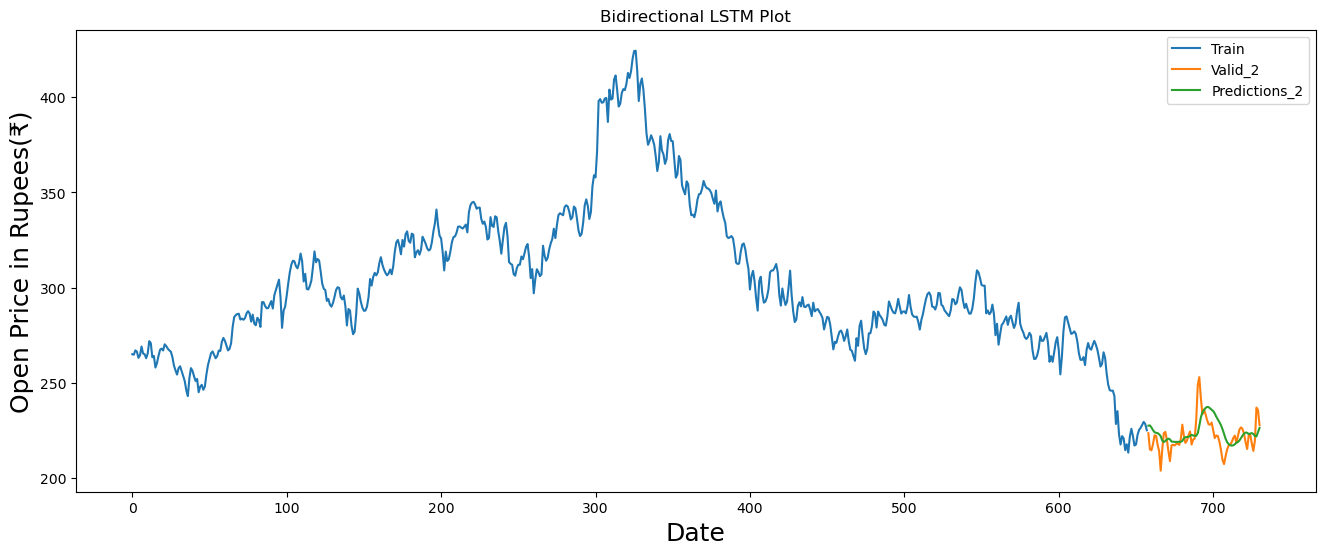

In [71]:
plt.figure(figsize = (16,6))
plt.title('Bidirectional LSTM Plot')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price in Rupees(₹)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid_2[['Open', 'Predictions_2']])
plt.legend(['Train', 'Valid_2', 'Predictions_2'], loc = 'upper right')
plt.show()

In [72]:
valid_2

Open  Predictions_2
658  223.500000     227.450623
659  215.000000     227.604294
660  214.500000     226.500900
661  217.716729     225.139221
662  222.374482     224.038467
..          ...            ...
726  214.203110     223.109955
727  219.600000     222.036438
728  236.950000     221.797913
729  235.700000     224.051270
730  227.700000     226.247498

[73 rows x 2 columns]

##### 

# *****MODEL 3 - GRU (Gated Recurrent Unit) LSTM*****

## A) Model Building

In [73]:
from keras.layers import GRU

In [74]:
model_3 = Sequential()

model_3.add(GRU(units = 50,input_shape = (x_train.shape[1],1)))

model_3.add(Dense(units = 1))

## B) Fitting the Model

In [75]:
# Compile the model
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])

# Train the model
model_3.fit(x_train, y_train, batch_size = 1, epochs = 1)

598/598 [==============================] - 17s 21ms/step - loss: 0.0054 - accuracy: 0.0017


## C) Create the Testing Data set

In [76]:
test_data = scaled_data[training_data_len - 60: , :]

In [77]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## D) Predicting the Values

In [78]:
predictions_3 = model_3.predict(x_test)
predictions_3 = scaler.inverse_transform(predictions_3)

3/3 [==============================] - 1s 12ms/step


## E) Get the root mean squared error Value (RMSE)

In [79]:
rmse_3 = np.sqrt(np.mean(((predictions_3 - y_test) ** 2)))
print('RMSE value of GRU LSTM :', rmse_3)

RMSE value of GRU LSTM : 7.897919081854671


## F) Plotting the Actual and Predicted Prices

In [80]:
train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions_3'] = predictions_3

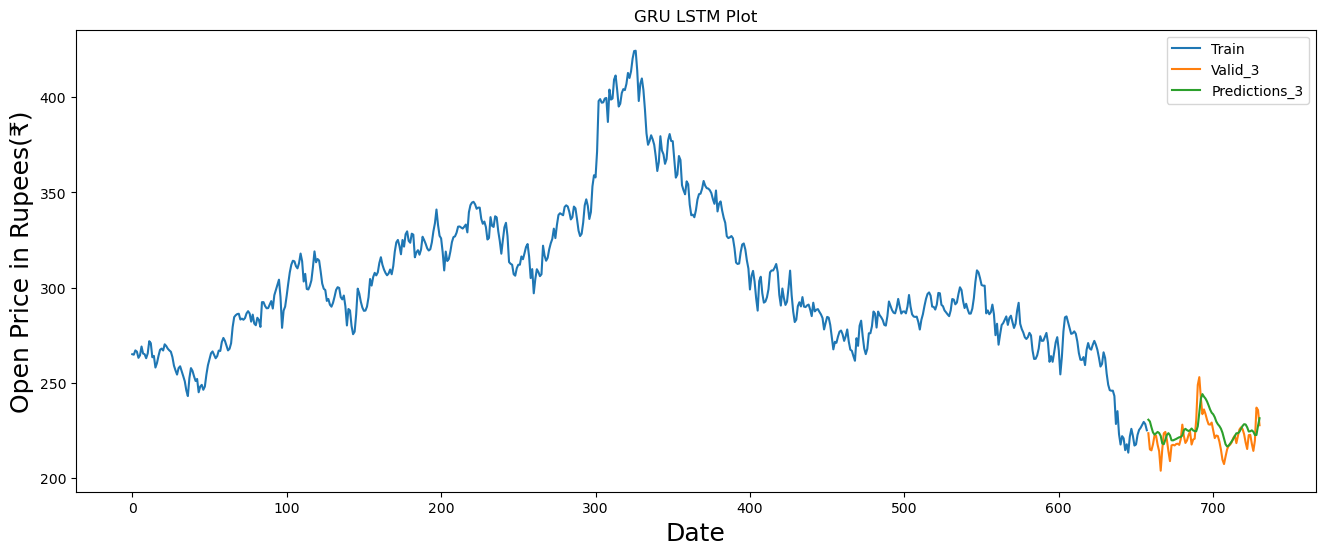

In [81]:
plt.figure(figsize = (16,6))
plt.title('GRU LSTM Plot')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price in Rupees(₹)', fontsize = 18)
plt.plot(train['Open'])
plt.plot(valid_3[['Open', 'Predictions_3']])
plt.legend(['Train', 'Valid_3', 'Predictions_3'], loc = 'upper right')
plt.show()

In [82]:
valid_3

Open  Predictions_3
658  223.500000     230.596268
659  215.000000     229.672745
660  214.500000     226.622910
661  217.716729     223.918640
662  222.374482     222.771591
..          ...            ...
726  214.203110     224.276596
727  219.600000     222.586990
728  236.950000     222.565964
729  235.700000     227.334534
730  227.700000     231.368332

[73 rows x 2 columns]

##### 

# *****MODEL 4 : BGRU (Bidirectional GRU) LSTM*****

## A) Model Building

In [83]:
from keras.layers import SpatialDropout1D

In [84]:
model_4 = Sequential()

model_4.add(Bidirectional(GRU(units = 50,input_shape = (x_train.shape[1],1))))

model_4.add(Dense(units = 1))

## B) Fitting the Model

In [85]:
# Compile the model
model_4.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])

# Train the model
model_4.fit(x_train, y_train, batch_size = 1, epochs = 1)

598/598 [==============================] - 23s 24ms/step - loss: 0.0074 - accuracy: 0.0017


## C) Create the Testing Data set

In [86]:
test_data = scaled_data[training_data_len - 60: , :]

In [87]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## D) Predicting the Values

In [88]:
predictions_4 = model_4.predict(x_test)
predictions_4 = scaler.inverse_transform(predictions_4)

3/3 [==============================] - 3s 14ms/step


## E) Get the root mean squared error Value (RMSE)

In [89]:
rmse_4 = np.sqrt(np.mean(((predictions_4 - y_test) ** 2)))
print('RMSE value of Bidirectional GRU LSTM :', rmse_4)

RMSE value of Bidirectional GRU LSTM : 11.010043205957137


## F) Plotting the Actual and Predicted Prices

In [90]:
train = data[:training_data_len]
valid_4 = data[training_data_len:]
valid_4['Predictions_4'] = predictions_4

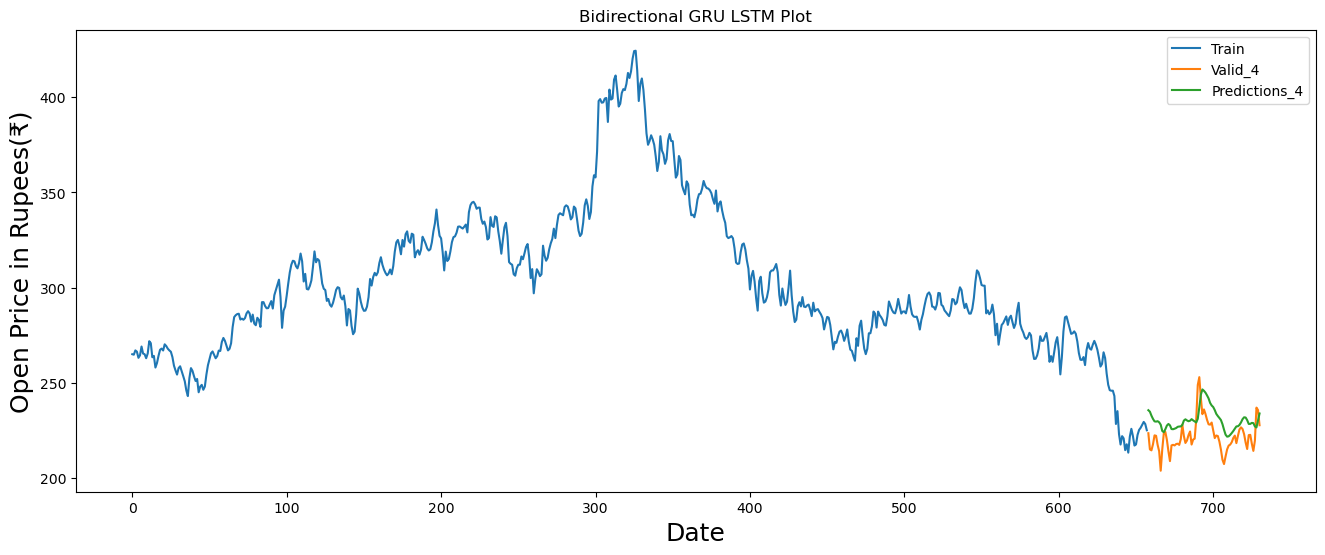

In [91]:
plt.figure(figsize = (16,6))
plt.title('Bidirectional GRU LSTM Plot')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price in Rupees(₹)', fontsize = 18)
plt.plot(train['Open'])
plt.plot(valid_4[['Open', 'Predictions_4']])
plt.legend(['Train', 'Valid_4', 'Predictions_4'], loc = 'upper right')
plt.show()

In [92]:
valid_4

Open  Predictions_4
658  223.500000     235.592072
659  215.000000     234.798859
660  214.500000     232.723816
661  217.716729     231.029739
662  222.374482     229.718811
..          ...            ...
726  214.203110     228.793518
727  219.600000     227.070999
728  236.950000     226.546799
729  235.700000     230.197540
730  227.700000     233.864868

[73 rows x 2 columns]

##### 

# *****7. Data Driven Forecasting Methods*****

## 7.1 Data preprocessing for models :

In [93]:
df = stock_price.iloc[:,1:2]
df

Open
0    265.000000
1    264.750000
2    267.000000
3    266.353906
4    263.103993
..          ...
726  214.203110
727  219.600000
728  236.950000
729  235.700000
730  227.700000

[731 rows x 1 columns]

## 7.2 Splitting Data :

In [94]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [95]:
Train = df.head(550)
Test = df.tail(181)

## 7.3 Time series decomposition plot :

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose

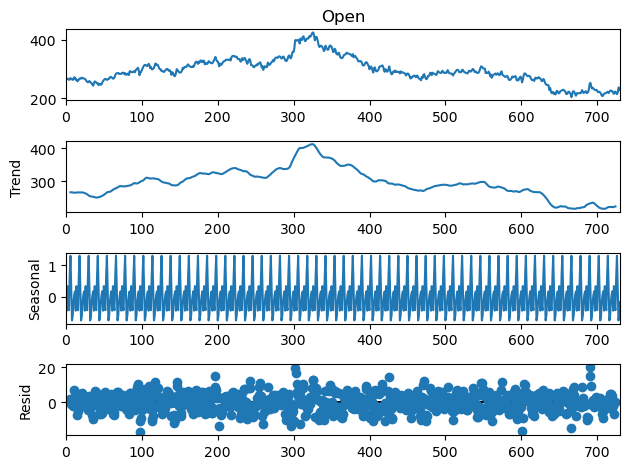

In [97]:
ts_decompose = seasonal_decompose(df.Open,period = 12)
ts_decompose.plot()
plt.show()

## 7.4 Evaluation Metric RMSE :

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [99]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

##### 

# *****MODEL 5 - Simple Exponential Method*****

In [100]:
simple_model = SimpleExpSmoothing(Train["Open"]).fit()
pred_simple_model = simple_model.predict(start = Test.index[0],end = Test.index[-1])

In [101]:
rmse_simple_model = RMSE(Test.Open, pred_simple_model)
print('RMSE Value of Simple Exponential :',rmse_simple_model)

RMSE Value of Simple Exponential : 64.45888032916415


# *****MODEL 6 - Holt Method*****

In [102]:
holt_model = Holt(Train["Open"]).fit()
pred_holt_model = holt_model.predict(start = Test.index[0],end = Test.index[-1])

In [103]:
rmse_holt_model = RMSE(Test.Open, pred_holt_model)
print('RMSE Value of Holt :',rmse_holt_model)

RMSE Value of Holt : 71.87877029851552


# *****MODEL 7 - Holts winter exponential smoothing with additive seasonality and additive trend*****

In [104]:
holt_model_add_add = ExponentialSmoothing(Train["Open"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
pred_holt_add_add = holt_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

In [105]:
rmse_holt_add_add_model = RMSE(Test.Open, pred_holt_add_add)
print('RMSE Value of Holts add and add :',rmse_holt_add_add_model)

RMSE Value of Holts add and add : 71.88988882390593


# *****MODEL 8 - Holts winter exponential smoothing with multiplicative seasonality and additive trend*****

In [106]:
holt_model_multi_add = ExponentialSmoothing(Train["Open"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit() 
pred_holt_multi_add = holt_model_multi_add.predict(start = Test.index[0],end = Test.index[-1])

In [107]:
rmse_holt_model_multi_add_model = RMSE(Test.Open, pred_holt_multi_add)
print('RMSE Value of Holts Multi and add :',rmse_holt_model_multi_add_model)

RMSE Value of Holts Multi and add : 71.76378860570286


##### 

# *****8. Model based Forecasting Methods*****

## 8.1 Data preprocessing for Models :

In [108]:
df = stock_price.iloc[:,1:2]
df

Open
0    265.000000
1    264.750000
2    267.000000
3    266.353906
4    263.103993
..          ...
726  214.203110
727  219.600000
728  236.950000
729  235.700000
730  227.700000

[731 rows x 1 columns]

In [109]:
df["t"] = np.arange(0,731)
df["t_squared"] = df["t"]*df["t"]

df["log_Open"] = np.log(df["Open"])
df.head()

Open  t  t_squared  log_Open
0  265.000000  0          0  5.579730
1  264.750000  1          1  5.578786
2  267.000000  2          4  5.587249
3  266.353906  3          9  5.584826
4  263.103993  4         16  5.572549

## 8.2 Splitting data :

In [110]:
Train = df.head(550)
Test = df.tail(181)

##### 

# *****MODEL 9 - Linear Model*****

In [111]:
import statsmodels.formula.api as smf 

In [112]:
linear_model = smf.ols('Open~t',data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [113]:
rmse_linear_model = RMSE(Test['Open'], pred_linear)
print('RMSE Value of Linear :',rmse_linear_model)

RMSE Value of Linear : 84.92418859265439


# *****MODEL 10 - Exponential Model*****

In [114]:
Exp_model = smf.ols('log_Open~t',data = Train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))

In [115]:
rmse_Exp_model = RMSE(Test['Open'], np.exp(pred_Exp))
print('RMSE Value of Exponential :',rmse_Exp_model)

RMSE Value of Exponential : 83.83519725106986


# *****MODEL 11 - Quadratic Model*****

In [116]:
Quad_model= smf.ols('Open~t+t_squared',data = Train).fit()
pred_Quad = pd.Series(Quad_model.predict(Test[["t","t_squared"]]))

In [117]:
rmse_Quad_model = RMSE(Test['Open'], pred_Quad)
print('RMSE Value of Quadratic :',rmse_Quad_model)

RMSE Value of Quadratic : 58.7651997752783


# *****MODEL 12 - ARIMA Model*****

## 8.3 Data preprocessing for Models :

In [118]:
series = stock_price.iloc[:,1:2]
series

Open
0    265.000000
1    264.750000
2    267.000000
3    266.353906
4    263.103993
..          ...
726  214.203110
727  219.600000
728  236.950000
729  235.700000
730  227.700000

[731 rows x 1 columns]

## 8.4 Separate out a validation dataset :

In [119]:
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)

Dataset 719, Validation 12


## 8.5 Evaluate a Base model :

In [120]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [121]:
train = read_csv('dataset.csv', header = None, index_col = 0, parse_dates = True, squeeze = True)

In [122]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:]

In [123]:
print(train.shape)
print(test.shape)

(539,)
(180,)


## 8.6 Walk Farward Validation :

In [124]:
history = [x for x in train]
predictions = list()

In [125]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=293.050, Expected=289.250
>Predicted=289.250, Expected=291.500
>Predicted=291.500, Expected=288.500
>Predicted=288.500, Expected=286.316
>Predicted=286.316, Expected=286.337
>Predicted=286.337, Expected=288.940
>Predicted=288.940, Expected=294.500
>Predicted=294.500, Expected=303.017
>Predicted=303.017, Expected=309.050
>Predicted=309.050, Expected=308.000
>Predicted=308.000, Expected=304.936
>Predicted=304.936, Expected=301.336
>Predicted=301.336, Expected=301.000
>Predicted=301.000, Expected=301.000
>Predicted=301.000, Expected=286.450
>Predicted=286.450, Expected=288.000
>Predicted=288.000, Expected=286.000
>Predicted=286.000, Expected=287.060
>Predicted=287.060, Expected=291.060
>Predicted=291.060, Expected=286.000
>Predicted=286.000, Expected=275.000
>Predicted=275.000, Expected=281.000
>Predicted=281.000, Expected=270.000
>Predicted=270.000, Expected=275.450
>Predicted=275.450, Expected=280.338
>Predicted=280.338, Expected=281.343
>Predicted=281.343, Expected=283.100
>

In [126]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE Value of ARIMA : %.3f' % rmse)

RMSE Value of ARIMA : 5.117


In [127]:
rmse_Persistence_model = 5.117

##### 

# 9. Future Forecasting

## 9.1 Data preprocessing for models :

In [128]:
stock_details_resample

Open    High     Low   Close
Date                                      
2017-11-01  265.00  266.85  260.95  264.75
2017-11-02  264.75  268.65  262.00  266.20
2017-11-03  267.00  268.50  263.55  266.60
2017-11-04     NaN     NaN     NaN     NaN
2017-11-05     NaN     NaN     NaN     NaN
...            ...     ...     ...     ...
2019-10-28     NaN     NaN     NaN     NaN
2019-10-29  219.60  236.40  219.60  234.25
2019-10-30  236.95  236.95  231.25  234.40
2019-10-31  235.70  236.50  227.05  228.00
2019-11-01  227.70  239.50  227.50  237.60

[731 rows x 4 columns]

In [129]:
df = stock_details_resample.interpolate(method = "polynomial", order = 2)
round(df, 2)

Open    High     Low   Close
Date                                      
2017-11-01  265.00  266.85  260.95  264.75
2017-11-02  264.75  268.65  262.00  266.20
2017-11-03  267.00  268.50  263.55  266.60
2017-11-04  266.35  269.39  264.06  267.73
2017-11-05  263.10  271.40  263.37  269.32
...            ...     ...     ...     ...
2019-10-28  214.20  228.96  216.15  227.26
2019-10-29  219.60  236.40  219.60  234.25
2019-10-30  236.95  236.95  231.25  234.40
2019-10-31  235.70  236.50  227.05  228.00
2019-11-01  227.70  239.50  227.50  237.60

[731 rows x 4 columns]

## 9.2 Model Training :

In [130]:
y = df['Open'].fillna(method='ffill')
y

Date
2017-11-01    265.000000
2017-11-02    264.750000
2017-11-03    267.000000
2017-11-04    266.353906
2017-11-05    263.103993
                 ...    
2019-10-28    214.203110
2019-10-29    219.600000
2019-10-30    236.950000
2019-10-31    235.700000
2019-11-01    227.700000
Freq: D, Name: Open, Length: 731, dtype: float64

In [131]:
y = y.values.reshape(-1,1)
y

array([[265.        ],
       [264.75      ],
       [267.        ],
       [266.35390635],
       [263.1039933 ],
       [264.4       ],
       [269.05      ],
       [265.35      ],
       [265.        ],
       [262.9       ],
       [265.37589845],
       [271.82444931],
       [270.8       ],
       [263.4       ],
       [264.1       ],
       [258.        ],
       [260.35      ],
       [264.14808407],
       [267.33156833],
       [267.95      ],
       [266.95      ],
       [270.2       ],
       [269.3       ],
       [267.9       ],
       [267.01307332],
       [266.28764779],
       [263.5       ],
       [259.        ],
       [256.5       ],
       [254.3       ],
       [257.7       ],
       [258.65652498],
       [256.16672132],
       [253.5       ],
       [250.8       ],
       [246.        ],
       [243.        ],
       [252.5       ],
       [257.69040032],
       [256.2591866 ],
       [253.4       ],
       [250.95      ],
       [252.        ],
       [245

## 9.3 Normalizing the Dataset :

In [132]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(y)
y=scaler.transform(y)

In [133]:
n_lookback =180
n_forecast =90

## 9.4 Creating X_train and y_train Data Structures :

In [134]:
X =[]
Y =[]

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

## 9.5 Model Building Using LSTM :

In [135]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [136]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

## 9.6 Fitting the Model :

In [137]:
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X, Y, epochs=10, batch_size=32, verbose=0)

## 9.7 Create the Testing Data set :

In [138]:
X_ = y[- n_lookback:]  
X_ = X_.reshape(1, n_lookback, 1)

## 9.8 Predicting the Values :

In [139]:
Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 [==============================] - 2s 2s/step


In [140]:
df_past = df[['Open']].reset_index()
df_past.rename(columns={'index': 'Date', 'Open': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

In [141]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1) + pd.Timedelta(days=1), 
                                  periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

## 9.9 Plotting the Actual and Future Predicted Prices :

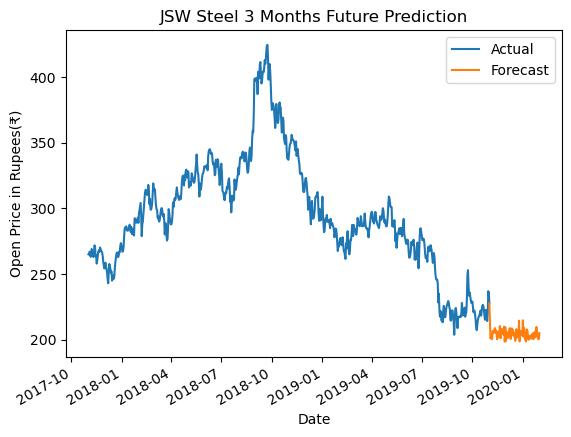

In [142]:
results = df_past.append(df_future).set_index('Date')
results.plot(title='JSW Steel 3 Months Future Prediction')
plt.ylabel('Open Price in Rupees(₹)')
plt.show()

In [143]:
df_future['Forecast']

0     200.968277
1     201.960098
2     203.053253
3     200.463852
4     206.527145
         ...    
85    204.562317
86    204.164200
87    200.446442
88    200.634430
89    205.033249
Name: Forecast, Length: 90, dtype: float32

##### 

# *****CONCLUSION*****

In [144]:
list = [['Stacked LSTM',rmse_1],['Bidirectional LSTM',rmse_2],['GRU (Gated Recurrent Unit) LSTM',rmse_3],
        ['BGRU (Bidirectional GRU) LSTM',rmse_4],['Simple Exponential Method',rmse_simple_model],
        ['Holt Method',rmse_holt_model],['Holt exp smoothing add Method',rmse_holt_add_add_model],
        ['Holt exp smoothing multi Method',rmse_holt_model_multi_add_model],['Linear Model',rmse_linear_model],
        ['Exponential Model',rmse_Exp_model],['Quadratic Model',rmse_Quad_model],
        ['Persistence/ ARIMA Model', rmse_Persistence_model]]

In [145]:
Result = pd.DataFrame(list, columns = ['Models', 'RMSE Values']) 
Result

Models  RMSE Values
0                      Stacked LSTM     8.660171
1                Bidirectional LSTM     8.252934
2   GRU (Gated Recurrent Unit) LSTM     7.897919
3     BGRU (Bidirectional GRU) LSTM    11.010043
4         Simple Exponential Method    64.458880
5                       Holt Method    71.878770
6     Holt exp smoothing add Method    71.889889
7   Holt exp smoothing multi Method    71.763789
8                      Linear Model    84.924189
9                 Exponential Model    83.835197
10                  Quadratic Model    58.765200
11         Persistence/ ARIMA Model     5.117000

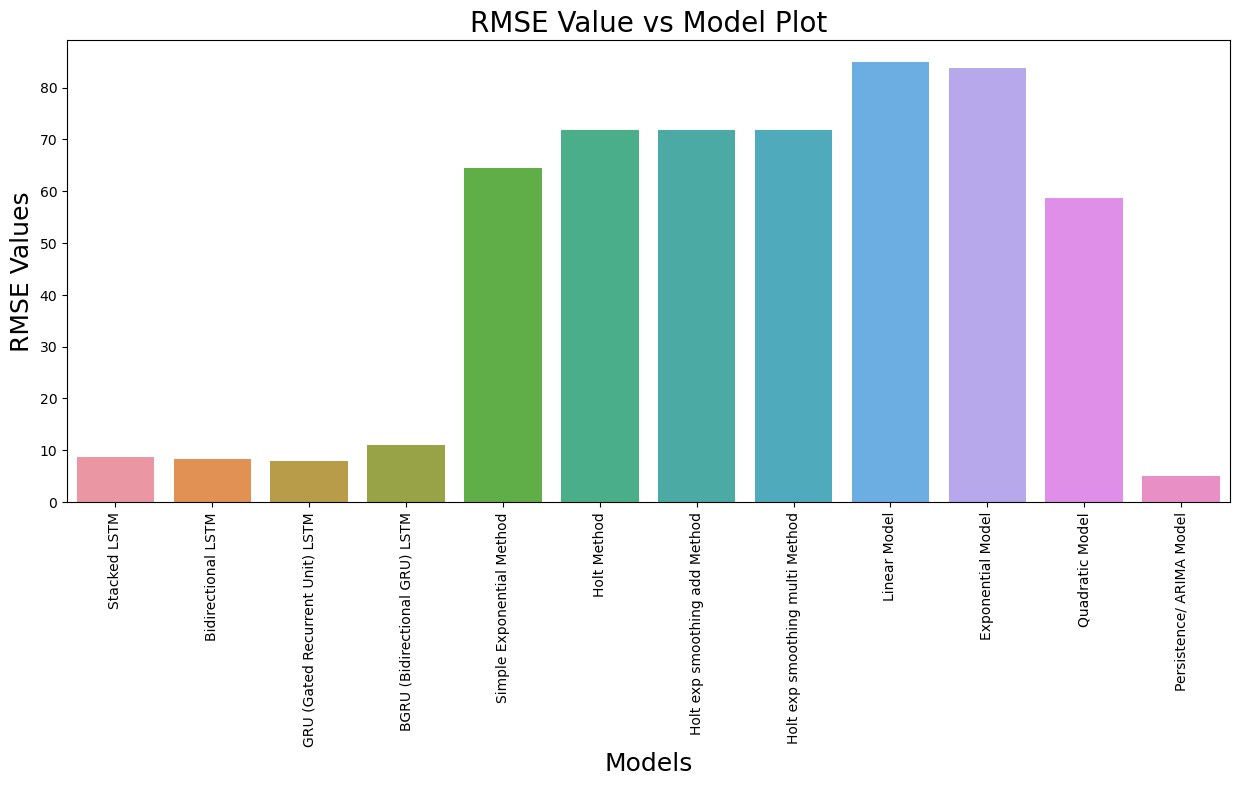

In [146]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'RMSE Values')

plt.title('RMSE Value vs Model Plot', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('RMSE Values', fontsize=18)

plt.xticks(rotation = 90)
plt.show()

In [147]:
from tabulate import tabulate

col_names = ['Models', 'RMSE Values']

print(tabulate(list, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════════════╤═══════════════╕
│ Models                          │   RMSE Values │
╞═════════════════════════════════╪═══════════════╡
│ Stacked LSTM                    │       8.66017 │
├─────────────────────────────────┼───────────────┤
│ Bidirectional LSTM              │       8.25293 │
├─────────────────────────────────┼───────────────┤
│ GRU (Gated Recurrent Unit) LSTM │       7.89792 │
├─────────────────────────────────┼───────────────┤
│ BGRU (Bidirectional GRU) LSTM   │      11.01    │
├─────────────────────────────────┼───────────────┤
│ Simple Exponential Method       │      64.4589  │
├─────────────────────────────────┼───────────────┤
│ Holt Method                     │      71.8788  │
├─────────────────────────────────┼───────────────┤
│ Holt exp smoothing add Method   │      71.8899  │
├─────────────────────────────────┼───────────────┤
│ Holt exp smoothing multi Method │      71.7638  │
├─────────────────────────────────┼───────────────┤
│ Linear Mod

##### 

# THE END